Este notebook tem o intuito de extração de características interpretávéis para o telepectador, com ele calculei:
+ Média de horária de 7 meses de um determinado ano;
+ Média mensal de 7 meses de um determinado ano;
+ A têndencia com base na média diária dos 7 meses de cada ano.

Outros como a sazonalidade e autocorrelação da série eu calculei, mas não consegui ter algo de impacto que comprovasse minha hipóste, ou talvez seja ignorância minha de não ter visto algo.

In [2]:
# Gerar os labels das datas
import datetime

dt = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2020, 7, 30)
step = datetime.timedelta(days=1)

datas = []

while dt < end:
    datas.append(dt.strftime('%m-%d'))
    dt += step

# 1. Import necessários

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import autocorrelation_plot
import metodos_imputacao as m_imputacao
import funcoes_importantes as f_im
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
fi = f_im.funcoes_importantes()
mimputacao = m_imputacao.metodos_de_imputacao()
warnings.filterwarnings('ignore')

# 2. Carregar dados

In [4]:
# Bases de Cerqueira Cesar 

ccesar_16 = pd.read_csv('../01.Dados/CSV/CO_Cerqueria_2016.csv').reset_index(drop=True).iloc[:-1,:]
ccesar_17 = pd.read_csv('../01.Dados/CSV/CO_Cerqueria_2017.csv')
ccesar_18 = pd.read_csv('../01.Dados/CSV/CO_Cerqueria_2018.csv')
ccesar_19 = pd.read_csv('../01.Dados/CSV/CO_Cerqueria_2019.csv')
ccesar_20 = pd.read_csv('../01.Dados/CSV/CO_Cerqueria_2020.csv').reset_index(drop=True).iloc[:-1,:]

# Base de Congonhas

congonhas_16 = pd.read_csv('../01.Dados/CSV/CO_Congonhas_2016.csv').reset_index(drop=True).iloc[:-1,:]
congonhas_17 = pd.read_csv('../01.Dados/CSV/CO_Congonhas_2017.csv')
congonhas_18 = pd.read_csv('../01.Dados/CSV/CO_Congonhas_2018.csv')
congonhas_19 = pd.read_csv('../01.Dados/CSV/CO_Congonhas_2019.csv')
congonhas_20 = pd.read_csv('../01.Dados/CSV/CO_Congonhas_2020.csv').reset_index(drop=True).iloc[:-1,:]

# Base de Mooca

mooca_16 = pd.read_csv('../01.Dados/CSV/CO_Mooca_2016.csv').reset_index(drop=True).iloc[:-1,:]
mooca_17 = pd.read_csv('../01.Dados/CSV/CO_Mooca_2017.csv')
mooca_18 = pd.read_csv('../01.Dados/CSV/CO_Mooca_2018.csv')
mooca_19 = pd.read_csv('../01.Dados/CSV/CO_Mooca_2019.csv')
mooca_20 = pd.read_csv('../01.Dados/CSV/CO_Mooca_2020.csv').reset_index(drop=True).iloc[:-1,:]

# Base Parque Pedro II

ppredo_16 = pd.read_csv('../01.Dados/CSV/CO_P_Pedro_2016.csv').reset_index(drop=True).iloc[:-1,:]
ppredo_17 = pd.read_csv('../01.Dados/CSV/CO_P_Pedro_2017.csv')
ppredo_18 = pd.read_csv('../01.Dados/CSV/CO_P_Pedro_2018.csv')
ppredo_19 = pd.read_csv('../01.Dados/CSV/CO_P_Pedro_2019.csv')
ppredo_20 = pd.read_csv('../01.Dados/CSV/CO_P_Pedro_2020.csv').reset_index(drop=True).iloc[:-1,:]

# Base Pinheiros 

pinheiros_16 = pd.read_csv('../01.Dados/CSV/CO_Pinheiros_2016.csv').reset_index(drop=True).iloc[:-1,:]
pinheiros_17 = pd.read_csv('../01.Dados/CSV/CO_Pinheiros_2017.csv')
pinheiros_18 = pd.read_csv('../01.Dados/CSV/CO_Pinheiros_2018.csv')
pinheiros_19 = pd.read_csv('../01.Dados/CSV/CO_Pinheiros_2019.csv')
pinheiros_20 = pd.read_csv('../01.Dados/CSV/CO_Pinheiros_2020.csv').reset_index(drop=True).iloc[:-1,:]

mes_null = pd.DataFrame([[np.nan]*24 for i in range(365-pinheiros_16.shape[0])], columns=[str(i) for i in range(1,25)])
pinheiros_16 = pd.concat([pinheiros_16, mes_null], axis='rows')

# 3.Tratamento de dados Faltantes

# 3.1 Base de Cerqueira Cesar

In [5]:
raio_ccessar       = [7,7.4,4.7,3]
Cerqueira_Cesar_16 = [ccesar_16,congonhas_16,mooca_16,ppredo_16,pinheiros_16]
Cerqueira_Cesar_17 = [ccesar_17,congonhas_17,mooca_17,ppredo_17,pinheiros_17]
Cerqueira_Cesar_18 = [ccesar_18,congonhas_18,mooca_18,ppredo_18,pinheiros_18]
Cerqueira_Cesar_19 = [ccesar_19,congonhas_19,mooca_19,ppredo_19,pinheiros_19]
Cerqueira_Cesar_20 = [ccesar_20,congonhas_20,mooca_20,ppredo_20,pinheiros_20]   

ccesar_16,a,b,c = mimputacao.completa_serie_IID(Cerqueira_Cesar_16,raio_ccessar)
ccesar_17,a,b,c = mimputacao.completa_serie_IID(Cerqueira_Cesar_17,raio_ccessar)
ccesar_18,a,b,c = mimputacao.completa_serie_IID(Cerqueira_Cesar_18,raio_ccessar)
ccesar_19,a,b,c = mimputacao.completa_serie_IID(Cerqueira_Cesar_19,raio_ccessar)
ccesar_20,a,b,c = mimputacao.completa_serie_IID(Cerqueira_Cesar_20,raio_ccessar)

# 3.2 Base de Congonhas

In [6]:
raio_congonhas = [2.79,7.26,7,8.73]
Congonhas_16   = [congonhas_16,pinheiros_16,ccesar_16,ppredo_16]
Congonhas_17   = [congonhas_17,pinheiros_17,ccesar_17,ppredo_17]
Congonhas_18   = [congonhas_18,pinheiros_18,ccesar_18,ppredo_18]
Congonhas_19   = [congonhas_19,pinheiros_19,ccesar_19,ppredo_19]
Congonhas_20   = [congonhas_20,pinheiros_20,ccesar_20,ppredo_20]

congonhas_16,a,b,c = mimputacao.completa_serie_IID(Congonhas_16,raio_congonhas)
congonhas_17,a,b,c = mimputacao.completa_serie_IID(Congonhas_17,raio_congonhas)
congonhas_18,a,b,c = mimputacao.completa_serie_IID(Congonhas_18,raio_congonhas)
congonhas_19,a,b,c = mimputacao.completa_serie_IID(Congonhas_19,raio_congonhas)
congonhas_20,a,b,c = mimputacao.completa_serie_IID(Congonhas_20,raio_congonhas)

# 3.3 Base de Mooca

In [7]:
raio_Mooca = [2.84,7.33]
Mooca_16   = [mooca_16,pinheiros_16,ccesar_16]
Mooca_17   = [mooca_17,pinheiros_17,ccesar_17]
Mooca_18   = [mooca_18,pinheiros_18,ccesar_18]
Mooca_19   = [mooca_19,pinheiros_19,ccesar_19]
Mooca_20   = [mooca_20,pinheiros_20,ccesar_20]

mooca_16,a,b,c = mimputacao.completa_serie_IID(Mooca_16,raio_Mooca)
mooca_17,a,b,c = mimputacao.completa_serie_IID(Mooca_17,raio_Mooca)
mooca_18,a,b,c = mimputacao.completa_serie_IID(Mooca_18,raio_Mooca)
mooca_19,a,b,c = mimputacao.completa_serie_IID(Mooca_19,raio_Mooca)
mooca_20,a,b,c = mimputacao.completa_serie_IID(Mooca_20,raio_Mooca)

# 3.4 Base Parque Pedro II

In [8]:
raio_parque_pedro_II = [2.81,4.68,7.73,8.71]
Parque_Pedro_II_16   = [ppredo_16,mooca_16,ccesar_16,pinheiros_16,congonhas_16]
Parque_Pedro_II_17   = [ppredo_17,mooca_17,ccesar_17,pinheiros_17,congonhas_17]
Parque_Pedro_II_18   = [ppredo_18,mooca_18,ccesar_18,pinheiros_18,congonhas_18]
Parque_Pedro_II_19   = [ppredo_19,mooca_19,ccesar_19,pinheiros_19,congonhas_19]
Parque_Pedro_II_20   = [ppredo_20,mooca_20,ccesar_20,pinheiros_20,congonhas_20]

ppredo_16,a,b,c = mimputacao.completa_serie_IID(Parque_Pedro_II_16,raio_parque_pedro_II)
ppredo_17,a,b,c = mimputacao.completa_serie_IID(Parque_Pedro_II_17,raio_parque_pedro_II)
ppredo_18,a,b,c = mimputacao.completa_serie_IID(Parque_Pedro_II_18,raio_parque_pedro_II)
ppredo_19,a,b,c = mimputacao.completa_serie_IID(Parque_Pedro_II_19,raio_parque_pedro_II)
ppredo_20,a,b,c = mimputacao.completa_serie_IID(Parque_Pedro_II_20,raio_parque_pedro_II)

# 3.5 Base Pinheiros 

In [9]:
raio_pinheiros = [3.15,7.76,7.26]
Pinheiros_16   = [pinheiros_16,ccesar_16,ppredo_16,congonhas_16]
Pinheiros_17   = [pinheiros_17,ccesar_17,ppredo_17,congonhas_17]
Pinheiros_18   = [pinheiros_18,ccesar_18,ppredo_18,congonhas_18]
Pinheiros_19   = [pinheiros_19,ccesar_19,ppredo_19,congonhas_19]
Pinheiros_20   = [pinheiros_20,ccesar_20,ppredo_20,congonhas_20]

pinheiros_16,a,b,c = mimputacao.completa_serie_EM(pinheiros_16)
pinheiros_17,a,b,c = mimputacao.completa_serie_EM(pinheiros_17)
pinheiros_18,a,b,c = mimputacao.completa_serie_EM(pinheiros_18)
pinheiros_19,a,b,c = mimputacao.completa_serie_EM(pinheiros_19)
pinheiros_20,a,b,c = mimputacao.completa_serie_EM(pinheiros_20)

# 4. Extração de caracteristica

# 4.1 Média das 24 horas

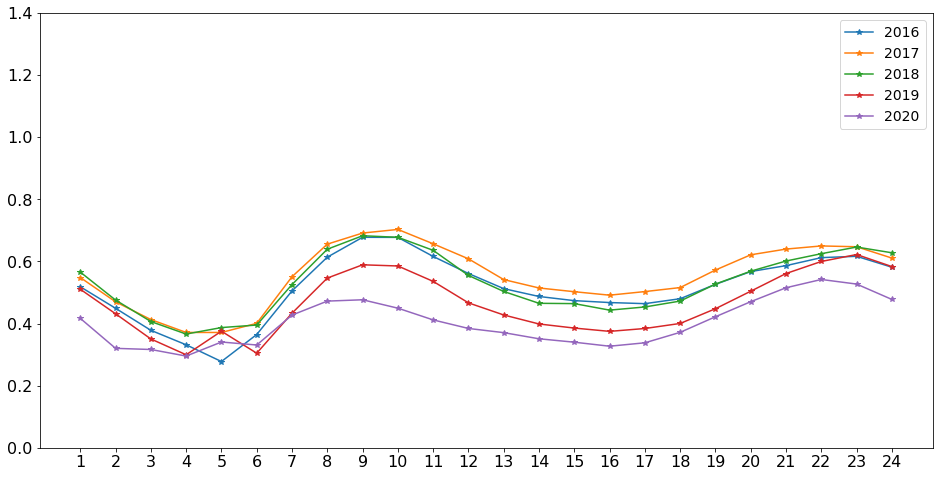

[0.032227698725987415,
 0.01627121493814646,
 0.02260620762836153,
 0.03076896787989135,
 0.21295812929217853,
 0.004239784736475673,
 -0.0028347091843931057,
 7.61894184409686e-05,
 -0.02649651402189743,
 -0.02501039277963805,
 -0.008136059050000628,
 -0.024408605899166946,
 -0.03256956229182431,
 -0.04453022085113382,
 -0.03786586071667069,
 -0.05259372965952655,
 -0.02869212428186605,
 -0.027482020713378408,
 -0.015281231076574999,
 -0.0035429574895458234,
 0.017875304496578853,
 0.015217721624303435,
 0.026186937649541886,
 0.03241832481926112]

In [10]:
# Base de Cerqueria Cesar
plt.figure(figsize=(16,8))
# plt.title('Cerqueira Cesar',fontsize=20)
plt.plot(ccesar_16.mean(),'*-',label='2016')
plt.plot(ccesar_17.mean(),'*-',label='2017')
plt.plot(ccesar_18.mean(),'*-',label='2018')
plt.plot(ccesar_19.mean(),'*-',label='2019')
plt.plot(ccesar_20.mean(),'*-',label='2020')

plt.legend(loc='best', fontsize=14)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.ylim(0.0, 1.4)
plt.show()


vetor_media_4_anos_ccesar = [ccesar_16.mean(),
                             ccesar_17.mean(),
                             ccesar_18.mean(),
                             ccesar_19.mean()]

vetor_media_4_anos_ccesar = pd.DataFrame(vetor_media_4_anos_ccesar).mean(axis='rows').values

vetor_media_4_anos_ccesar = (vetor_media_4_anos_ccesar-ccesar_16.mean())/vetor_media_4_anos_ccesar
vetor_media_4_anos_ccesar.tolist()

Aqui você pode ver que a média horária dos meses de jan a jun do ano de 2020 é mais baixa do que a dos anos anteriores, isso dá ao fato do período da pandemia no qual teve grande impacto nos diferentes setores do comércio da região.

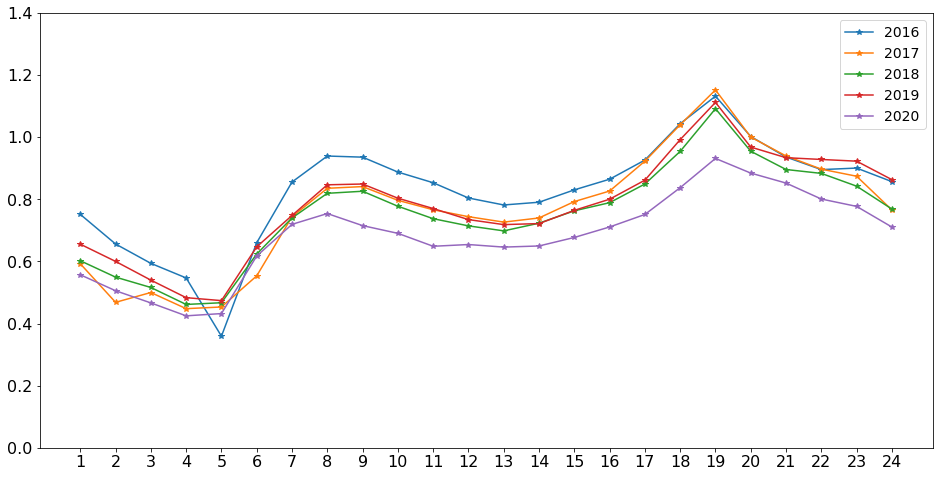

[0.14357903795352905,
 0.11059405963328145,
 0.1320680159762393,
 0.12388407902970636,
 0.014218468494666583,
 0.005812831315692437,
 0.0679211035075909,
 0.12329597584711034,
 0.17108116317175234,
 0.15431858337273333,
 0.17023194464668057,
 0.12671833987510941,
 0.11649128820353656,
 0.1264877275204007,
 0.14025057333434693,
 0.1332211886013707,
 0.1559461043704839,
 0.16877297093748284,
 0.16967532041007774,
 0.0987744709987784,
 0.080023235690396,
 0.1112009692681714,
 0.12181723368843833,
 0.12648787639366899]

In [11]:
# Base de Congonhas
plt.figure(figsize=(16,8))
# plt.title('Congonhas',fontsize=20)
plt.plot(congonhas_16.mean(),'*-',label='2016')
plt.plot(congonhas_17.mean(),'*-',label='2017')
plt.plot(congonhas_18.mean(),'*-',label='2018')
plt.plot(congonhas_19.mean(),'*-',label='2019')
plt.plot(congonhas_20.mean(),'*-',label='2020')

plt.legend(loc='best', fontsize=14)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.ylim(0.0, 1.4)
plt.show()

vetor_media_4_anos_congonhas = [congonhas_16.mean(),
                                congonhas_17.mean(),
                                congonhas_18.mean(),
                                congonhas_19.mean()]

vetor_media_4_anos_congonhas = pd.DataFrame(vetor_media_4_anos_congonhas).mean(axis='rows').values

vetor_media_4_anos_congonhas = (vetor_media_4_anos_congonhas-congonhas_20.mean())/vetor_media_4_anos_congonhas
vetor_media_4_anos_congonhas.tolist()

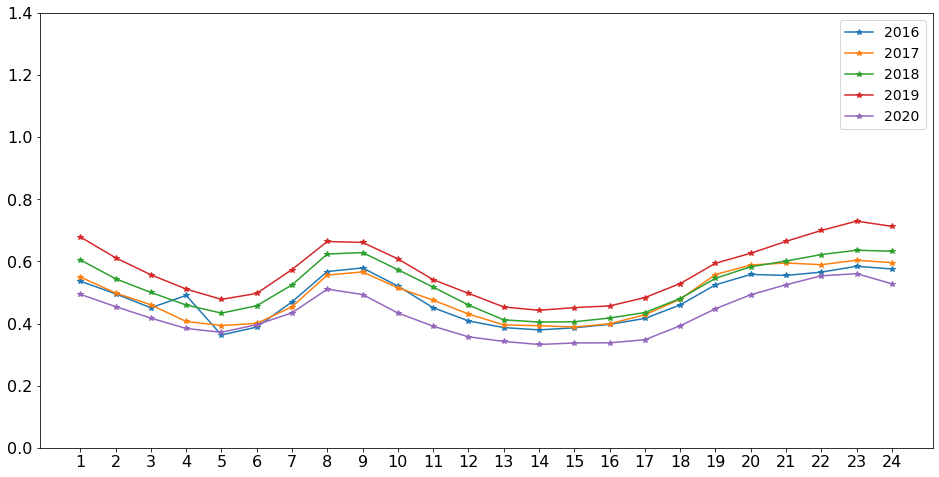

[0.16605100294878122,
 0.15450433085624504,
 0.15148885208417873,
 0.17740005672964515,
 0.10856795133710508,
 0.09064723055363791,
 0.1406624396572129,
 0.15289130851528399,
 0.18936906082455524,
 0.21698658327970555,
 0.21133777677420176,
 0.20404674467105158,
 0.16892910569491554,
 0.1786878472357285,
 0.17303392887161434,
 0.19128111008220053,
 0.21102591132234755,
 0.1930792597951998,
 0.19434364316255454,
 0.16318733843084096,
 0.13062865104959492,
 0.10593256983669343,
 0.12192698959545731,
 0.16110309796548142]

In [12]:
# Base de Mooca
plt.figure(figsize=(16,8))
# plt.title('Mooca',fontsize=20)
plt.plot(mooca_16.mean(),'*-',label='2016')
plt.plot(mooca_17.mean(),'*-',label='2017')
plt.plot(mooca_18.mean(),'*-',label='2018')
plt.plot(mooca_19.mean(),'*-',label='2019')
plt.plot(mooca_20.mean(),'*-',label='2020')

plt.legend(loc='best', fontsize=14)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.ylim(0.0, 1.4)
plt.show()

vetor_media_4_anos_mooca = [mooca_16.mean(),
                            mooca_17.mean(),
                            mooca_18.mean(),
                            mooca_19.mean()]

vetor_media_4_anos_mooca = pd.DataFrame(vetor_media_4_anos_mooca).mean(axis='rows').values

vetor_media_4_anos_mooca = (vetor_media_4_anos_mooca-mooca_20.mean())/vetor_media_4_anos_mooca
vetor_media_4_anos_mooca.tolist()

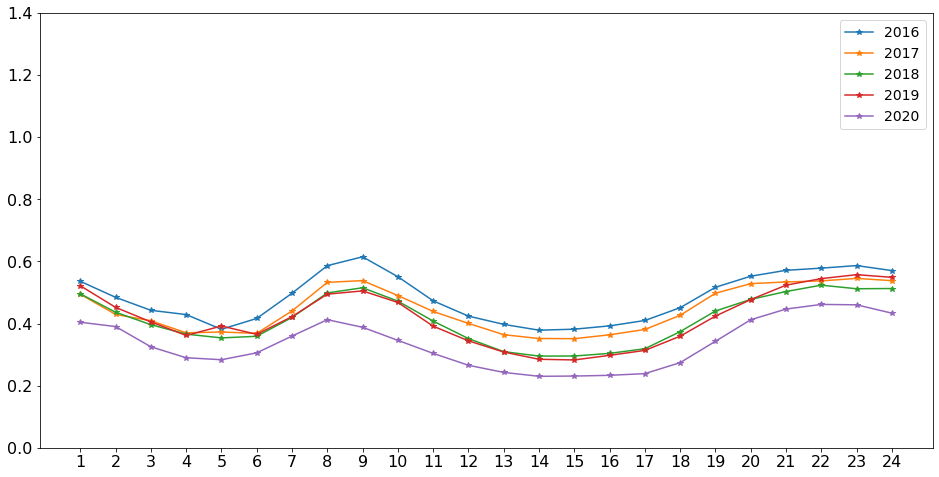

[0.2104490017160301,
 0.13372811302290716,
 0.21326297674452352,
 0.24048551204354734,
 0.24401350420181936,
 0.18969596495225977,
 0.19166883470659277,
 0.2189742777527736,
 0.285982578464108,
 0.30160520935175006,
 0.2896546797635655,
 0.30112862875340457,
 0.29614703043082363,
 0.2976427305180891,
 0.2956054843436445,
 0.3126628499933086,
 0.3288877005958479,
 0.31907942870963135,
 0.2699092182191101,
 0.1899144833286732,
 0.16196967772162116,
 0.15461368598418546,
 0.16356266359237798,
 0.20119686865123615]

In [13]:
# Base de Parque Pedro II
plt.figure(figsize=(16,8))
# plt.title('Parque Pedro  II',fontsize=20)
plt.plot(ppredo_16.mean(),'*-',label='2016')
plt.plot(ppredo_17.mean(),'*-',label='2017')
plt.plot(ppredo_18.mean(),'*-',label='2018')
plt.plot(ppredo_19.mean(),'*-',label='2019')
plt.plot(ppredo_20.mean(),'*-',label='2020')

plt.legend(loc='best', fontsize=14)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.ylim(0.0, 1.4)
plt.show()

vetor_media_4_anos_ppedro = [ppredo_16.mean(),
                             ppredo_17.mean(),
                             ppredo_18.mean(),
                             ppredo_19.mean()]

vetor_media_4_anos_ppedro = pd.DataFrame(vetor_media_4_anos_ppedro).mean(axis='rows').values

vetor_media_4_anos_ppedro = (vetor_media_4_anos_ppedro-ppredo_20.mean())/vetor_media_4_anos_ppedro
vetor_media_4_anos_ppedro.tolist()

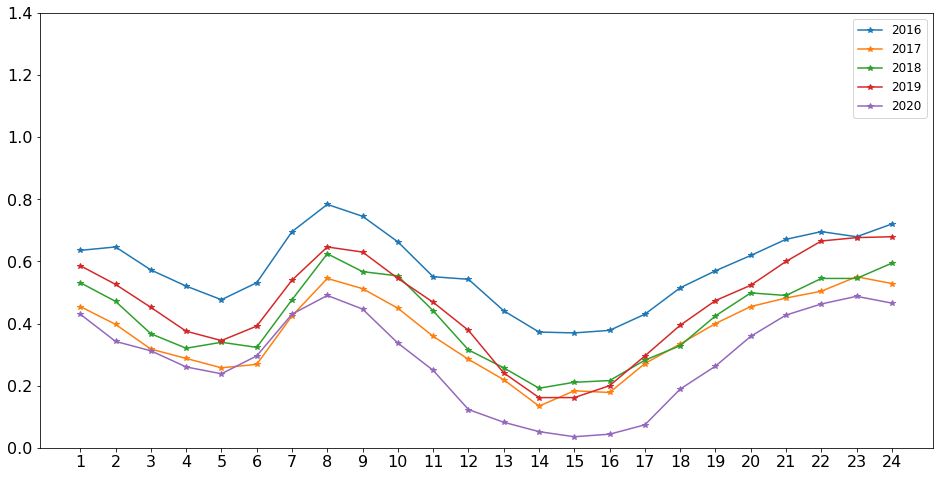

[0.22084367245657582,
 0.32885906040268464,
 0.2692307692307693,
 0.3078324225865208,
 0.3281853281853283,
 0.2188065099457505,
 0.1948717948717949,
 0.2455216016859853,
 0.2723214285714286,
 0.39033457249070636,
 0.45180722891566266,
 0.6756756756756757,
 0.7163120567375887,
 0.7579617834394904,
 0.8461538461538461,
 0.8197183098591551,
 0.7687366167023555,
 0.519163763066202,
 0.436950146627566,
 0.315032679738562,
 0.23809523809523805,
 0.2318181818181818,
 0.20446927374301663,
 0.26167209554831705]

In [14]:
# Base de Pinheiros
plt.figure(figsize=(16,8))
# plt.title('Pinheros',fontsize=20)
plt.plot(pinheiros_16.mean(),'*-',label='2016')
plt.plot(pinheiros_17.mean(),'*-',label='2017')
plt.plot(pinheiros_18.mean(),'*-',label='2018')
plt.plot(pinheiros_19.mean(),'*-',label='2019')
plt.plot(pinheiros_20.mean(),'*-',label='2020')

plt.legend(loc='best', fontsize=12)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.ylim(0.0, 1.4)
plt.show()

vetor_media_4_anos_pinheiros = [pinheiros_16.mean(),
                                pinheiros_17.mean(),
                                pinheiros_18.mean(),
                                pinheiros_19.mean()]

vetor_media_4_anos_pinheiros = pd.DataFrame(vetor_media_4_anos_pinheiros).mean(axis='rows').values

vetor_media_4_anos_pinheiros = (vetor_media_4_anos_pinheiros-pinheiros_20.mean())/vetor_media_4_anos_pinheiros
vetor_media_4_anos_pinheiros.tolist()

In [25]:
vetor_media = [np.round(vetor_media_4_anos_ccesar,2)*100,
               np.round(vetor_media_4_anos_congonhas,2)*100,
               np.round(vetor_media_4_anos_mooca,2)*100,
               np.round(vetor_media_4_anos_ppedro,2)*100,
               np.round(vetor_media_4_anos_pinheiros,2)*100]

vetor_media = pd.DataFrame(vetor_media, index=['Cerqueria César','Congonhas','Mooca','Parque Pedro II','Pinheiros'])
vetor_media['Média'] = vetor_media.mean(axis='columns').round(2)
vetor_media

1     2     3     4     5     6     7     8     9    10  \
Cerqueria César   3.0   2.0   2.0   3.0  21.0   0.0  -0.0   0.0  -3.0  -3.0   
Congonhas        14.0  11.0  13.0  12.0   1.0   1.0   7.0  12.0  17.0  15.0   
Mooca            17.0  15.0  15.0  18.0  11.0   9.0  14.0  15.0  19.0  22.0   
Parque Pedro II  21.0  13.0  21.0  24.0  24.0  19.0  19.0  22.0  29.0  30.0   
Pinheiros        22.0  33.0  27.0  31.0  33.0  22.0  19.0  25.0  27.0  39.0   

                 ...    16    17    18    19    20    21    22    23    24  \
Cerqueria César  ...  -5.0  -3.0  -3.0  -2.0  -0.0   2.0   2.0   3.0   3.0   
Congonhas        ...  13.0  16.0  17.0  17.0  10.0   8.0  11.0  12.0  13.0   
Mooca            ...  19.0  21.0  19.0  19.0  16.0  13.0  11.0  12.0  16.0   
Parque Pedro II  ...  31.0  33.0  32.0  27.0  19.0  16.0  15.0  16.0  20.0   
Pinheiros        ...  82.0  77.0  52.0  44.0  32.0  24.0  23.0  20.0  26.0   

                 Média  
Cerqueria César   0.33  
Congonhas        12.04  
Mooca            16.42  
Parque Pedro II  24.17  
Pinheiros        41.83  

[5 rows x 25 columns]

In [26]:
vetor_media.to_latex()

'\\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrrrrrr}\n\\toprule\n{} &     1 &     2 &     3 &     4 &     5 &     6 &     7 &     8 &     9 &    10 &    11 &    12 &    13 &    14 &    15 &    16 &    17 &    18 &    19 &    20 &    21 &    22 &    23 &    24 &  Média \\\\\n\\midrule\nCerqueria César &   3.0 &   2.0 &   2.0 &   3.0 &  21.0 &   0.0 &  -0.0 &   0.0 &  -3.0 &  -3.0 &  -1.0 &  -2.0 &  -3.0 &  -4.0 &  -4.0 &  -5.0 &  -3.0 &  -3.0 &  -2.0 &  -0.0 &   2.0 &   2.0 &   3.0 &   3.0 &   0.33 \\\\\nCongonhas       &  14.0 &  11.0 &  13.0 &  12.0 &   1.0 &   1.0 &   7.0 &  12.0 &  17.0 &  15.0 &  17.0 &  13.0 &  12.0 &  13.0 &  14.0 &  13.0 &  16.0 &  17.0 &  17.0 &  10.0 &   8.0 &  11.0 &  12.0 &  13.0 &  12.04 \\\\\nMooca           &  17.0 &  15.0 &  15.0 &  18.0 &  11.0 &   9.0 &  14.0 &  15.0 &  19.0 &  22.0 &  21.0 &  20.0 &  17.0 &  18.0 &  17.0 &  19.0 &  21.0 &  19.0 &  19.0 &  16.0 &  13.0 &  11.0 &  12.0 &  16.0 &  16.42 \\\\\nParque Pedro II &  21.0 &  13.0 &  21.0 &  24.0 &  2

#### Aqui você pode ver com esses resultados, a média horária dos meses de jan a jun do ano de 2020 é mais baixa do que a dos anos anteriores, a causa é o período da pandemia no qual teve grande impacto nos diferentes setores do comércio da região.

<div style='border-top: 2px solid red;'></div>

# 4.2 Média dos 7 meses

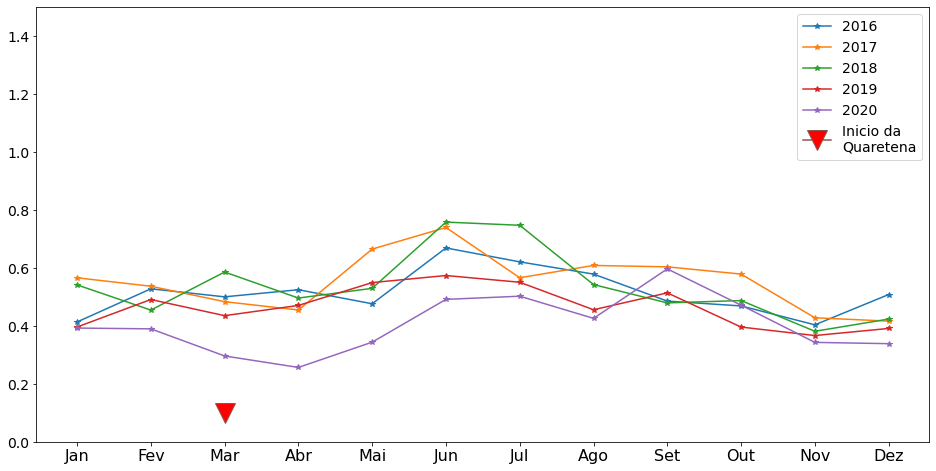

array([ 0.18101982,  0.22436448,  0.40889525,  0.4725953 ,  0.38056193,
        0.28259512,  0.1912232 ,  0.22041205, -0.14597082,  0.02333009,
        0.13135419,  0.2212484 ])

In [89]:
plt.figure(figsize=(16,8))
# plt.title('Cerqueira Cesar',fontsize=20)
plt.plot(fi.media_mes(mimputacao.divide_p_mes(ccesar_16)),'*-',label='2016')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(ccesar_17)),'*-',label='2017')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(ccesar_18)),'*-',label='2018')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(ccesar_19)),'*-',label='2019')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(ccesar_20)),'*-',label='2020')
plt.plot(2,0.1,marker='v',markerfacecolor='red',markersize=20,label='Inicio da\nQuaretena');

plt.xticks([i for i in range(12)],['Jan','Fev','Mar','Abr','Mai','Jun',
                                  'Jul','Ago','Set','Out','Nov','Dez'],rotation=0)
plt.legend(loc='best', fontsize=14)
plt.xticks(size = 16)
plt.yticks(size = 14)
plt.ylim(0.0, 1.5)
plt.show()

vetor_media_4_anos_ccesar = [fi.media_mes(mimputacao.divide_p_mes(ccesar_16)),
                      fi.media_mes(mimputacao.divide_p_mes(ccesar_17)),
                      fi.media_mes(mimputacao.divide_p_mes(ccesar_18)),
                      fi.media_mes(mimputacao.divide_p_mes(ccesar_19))]

vetor_media_4_anos_ccesar = pd.DataFrame(vetor_media_4_anos_ccesar).mean(axis='rows').values

vetor_media_4_anos_ccesar = (vetor_media_4_anos_ccesar-fi.media_mes(mimputacao.divide_p_mes(ccesar_20)))/vetor_media_4_anos_ccesar
vetor_media_4_anos_ccesar

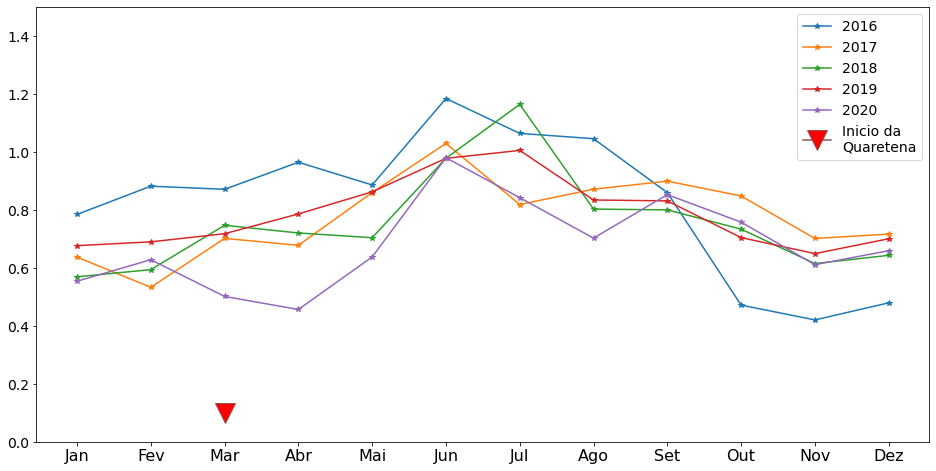

array([ 0.16928912,  0.0688965 ,  0.33972888,  0.42002305,  0.2300359 ,
        0.05994851,  0.16854801,  0.20912727, -0.00602948, -0.0992196 ,
       -0.02449239, -0.03820191])

In [90]:
del vetor_media_4_anos

plt.figure(figsize=(16,8))
# plt.title('Congonhas',fontsize=20)
plt.plot(fi.media_mes(mimputacao.divide_p_mes(congonhas_16)),'*-',label='2016')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(congonhas_17)),'*-',label='2017')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(congonhas_18)),'*-',label='2018')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(congonhas_19)),'*-',label='2019')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(congonhas_20)),'*-',label='2020')
plt.plot(2,0.1,marker='v',markerfacecolor='red',markersize=20,label='Inicio da\nQuaretena');

plt.xticks([i for i in range(12)],['Jan','Fev','Mar','Abr','Mai','Jun',
                                  'Jul','Ago','Set','Out','Nov','Dez'],rotation=0)
plt.legend(loc='best', fontsize=14)
plt.xticks(size = 16)
plt.yticks(size = 14)
plt.ylim(0.0, 1.5)
plt.show()

vetor_media_4_anos_congonhas = [fi.media_mes(mimputacao.divide_p_mes(congonhas_16)),
                                fi.media_mes(mimputacao.divide_p_mes(congonhas_17)),
                                fi.media_mes(mimputacao.divide_p_mes(congonhas_18)),
                                fi.media_mes(mimputacao.divide_p_mes(congonhas_19))]

vetor_media_4_anos_congonhas = pd.DataFrame(vetor_media_4_anos_congonhas).mean(axis='rows').values

vetor_media_4_anos_congonhas = (vetor_media_4_anos_congonhas-fi.media_mes(mimputacao.divide_p_mes(congonhas_20)))/vetor_media_4_anos_congonhas
vetor_media_4_anos_congonhas

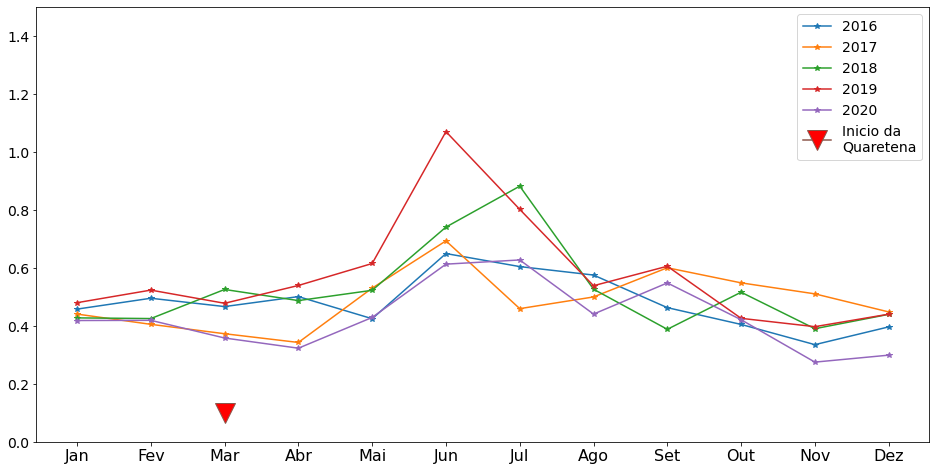

array([ 0.07319718,  0.09345115,  0.22273306,  0.30930271,  0.17996864,
        0.2226134 ,  0.08670071,  0.17638912, -0.06575813,  0.11126124,
        0.32665361,  0.30663516])

In [91]:
plt.figure(figsize=(16,8))
# plt.title('Mooca',fontsize=20)
plt.plot(fi.media_mes(mimputacao.divide_p_mes(mooca_16)),'*-',label='2016')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(mooca_17)),'*-',label='2017')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(mooca_18)),'*-',label='2018')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(mooca_19)),'*-',label='2019')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(mooca_20)),'*-',label='2020')
plt.plot(2,0.1,marker='v',markerfacecolor='red',markersize=20,label='Inicio da\nQuaretena');

plt.xticks([i for i in range(12)],['Jan','Fev','Mar','Abr','Mai','Jun',
                                  'Jul','Ago','Set','Out','Nov','Dez'],rotation=0)
plt.legend(loc='best', fontsize=14)
plt.xticks(size = 16)
plt.yticks(size = 14)
plt.ylim(0.0, 1.5)
plt.show()

vetor_media_4_anos_mooca = [fi.media_mes(mimputacao.divide_p_mes(mooca_16)),
                            fi.media_mes(mimputacao.divide_p_mes(mooca_17)),
                            fi.media_mes(mimputacao.divide_p_mes(mooca_18)),
                            fi.media_mes(mimputacao.divide_p_mes(mooca_19))]

vetor_media_4_anos_mooca = pd.DataFrame(vetor_media_4_anos_mooca).mean(axis='rows').values

vetor_media_4_anos_mooca = (vetor_media_4_anos_mooca-fi.media_mes(mimputacao.divide_p_mes(mooca_20)))/vetor_media_4_anos_mooca
vetor_media_4_anos_mooca

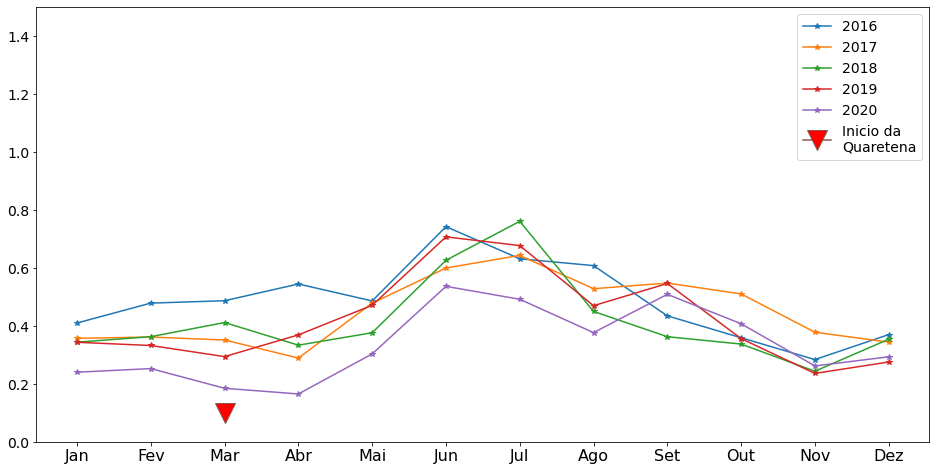

array([ 0.33961551,  0.34171896,  0.52135727,  0.57012172,  0.33038754,
        0.19810924,  0.27476931,  0.26692018, -0.07633947, -0.04279473,
        0.0824352 ,  0.12655792])

In [92]:
plt.figure(figsize=(16,8))
# plt.title('Parque Pedro II',fontsize=20)
plt.plot(fi.media_mes(mimputacao.divide_p_mes(ppredo_16)),'*-',label='2016')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(ppredo_17)),'*-',label='2017')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(ppredo_18)),'*-',label='2018')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(ppredo_19)),'*-',label='2019')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(ppredo_20)),'*-',label='2020')
plt.plot(2,0.1,marker='v',markerfacecolor='red',markersize=20,label='Inicio da\nQuaretena');

plt.xticks([i for i in range(12)],['Jan','Fev','Mar','Abr','Mai','Jun',
                                  'Jul','Ago','Set','Out','Nov','Dez'],rotation=0)
plt.legend(loc='best', fontsize=14)
plt.xticks(size = 16)
plt.yticks(size = 14)
plt.ylim(0.0, 1.5)
plt.show()

vetor_media_4_anos_ppedro = [fi.media_mes(mimputacao.divide_p_mes(ppredo_16)),
                             fi.media_mes(mimputacao.divide_p_mes(ppredo_17)),
                             fi.media_mes(mimputacao.divide_p_mes(ppredo_18)),
                             fi.media_mes(mimputacao.divide_p_mes(ppredo_19))]

vetor_media_4_anos_ppedro = pd.DataFrame(vetor_media_4_anos_ppedro).mean(axis='rows').values

vetor_media_4_anos_ppedro = (vetor_media_4_anos_ppedro-fi.media_mes(mimputacao.divide_p_mes(ppredo_20)))/vetor_media_4_anos_ppedro
vetor_media_4_anos_ppedro

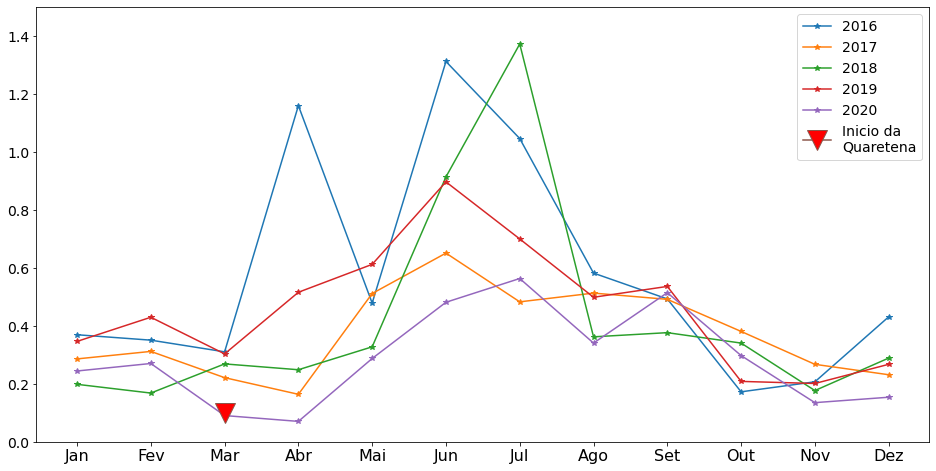

array([ 0.18562874,  0.14253136,  0.671875  ,  0.86510668,  0.40431869,
        0.4897182 ,  0.37430168,  0.30345334, -0.08484848, -0.07953064,
        0.36593592,  0.49528302])

In [93]:
plt.figure(figsize=(16,8))
# plt.title('Pinheiros',fontsize=20)
plt.plot(fi.media_mes(mimputacao.divide_p_mes(pinheiros_16)),'*-',label='2016')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(pinheiros_17)),'*-',label='2017')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(pinheiros_18)),'*-',label='2018')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(pinheiros_19)),'*-',label='2019')
plt.plot(fi.media_mes(mimputacao.divide_p_mes(pinheiros_20)),'*-',label='2020')
plt.plot(2,0.1,marker='v',markerfacecolor='red',markersize=20,label='Inicio da\nQuaretena');

plt.xticks([i for i in range(12)],['Jan','Fev','Mar','Abr','Mai','Jun',
                                  'Jul','Ago','Set','Out','Nov','Dez'],rotation=0)
plt.legend(loc='best', fontsize=14)
plt.xticks(size = 16)
plt.yticks(size = 14)
plt.ylim(0.0, 1.5)
plt.show()

vetor_media_4_anos_pinheiros = [fi.media_mes(mimputacao.divide_p_mes(pinheiros_16)),
                                fi.media_mes(mimputacao.divide_p_mes(pinheiros_17)),
                                fi.media_mes(mimputacao.divide_p_mes(pinheiros_18)),
                                fi.media_mes(mimputacao.divide_p_mes(pinheiros_19))]

vetor_media_4_anos_pinheiros = pd.DataFrame(vetor_media_4_anos_pinheiros).mean(axis='rows').values

vetor_media_4_anos_pinheiros = (vetor_media_4_anos_pinheiros-fi.media_mes(mimputacao.divide_p_mes(pinheiros_20)))/vetor_media_4_anos_pinheiros
vetor_media_4_anos_pinheiros

In [106]:
vetor_medias = [vetor_media_4_anos_ccesar,
               vetor_media_4_anos_congonhas,
               vetor_media_4_anos_mooca,
               vetor_media_4_anos_ppedro,
               vetor_media_4_anos_pinheiros]
vetor_medias = pd.DataFrame(np.round(vetor_medias, 3)*100, 
             index = ['Cerqueira Cesar','Congonhas','Mooca','Parque Pedro','Pinheiros'],
             columns = ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'])

vetor_medias['Média'] = np.round(vetor_medias.mean(axis = 'columns'),1)
vetor_medias

Jan   Fev   Mar   Abr   Mai   Jun   Jul   Ago   Set   Out  \
Cerqueira Cesar  18.1  22.4  40.9  47.3  38.1  28.3  19.1  22.0 -14.6   2.3   
Congonhas        16.9   6.9  34.0  42.0  23.0   6.0  16.9  20.9  -0.6  -9.9   
Mooca             7.3   9.3  22.3  30.9  18.0  22.3   8.7  17.6  -6.6  11.1   
Parque Pedro     34.0  34.2  52.1  57.0  33.0  19.8  27.5  26.7  -7.6  -4.3   
Pinheiros        18.6  14.3  67.2  86.5  40.4  49.0  37.4  30.3  -8.5  -8.0   

                  Nov   Dez  Média  
Cerqueira Cesar  13.1  22.1   21.6  
Congonhas        -2.4  -3.8   12.5  
Mooca            32.7  30.7   17.0  
Parque Pedro      8.2  12.7   24.4  
Pinheiros        36.6  49.5   34.4

#### Com este gráfico podemos ver que os meses de fevereiro para março teve um forte redução das emissões de gas carbonio, após isso de março para maio teve um aumento das emissões e que pode-se entender que como  retomada do comércio. Além disso, pode-se perceber que já nos meses de junho e junho os valor médio mensal do ano de 2020 se aproximou mais dos anos anteriores.

<div style='border-top: 2px solid red;'></div>

# 4.3 Tendência dos 7 meses

In [49]:
ccesar_16_decompose   = seasonal_decompose(ccesar_16.mean(axis='columns'),period=30)
ccesar_17_decompose   = seasonal_decompose(ccesar_17.mean(axis='columns'),period=30)
ccesar_18_decompose   = seasonal_decompose(ccesar_18.mean(axis='columns'),period=30)
ccesar_19_decompose   = seasonal_decompose(ccesar_19.mean(axis='columns'),period=30)
ccesar_20_decompose   = seasonal_decompose(ccesar_20.mean(axis='columns'),period=30)

congonhas_16_decompose   = seasonal_decompose(congonhas_16.mean(axis='columns'),period=30)
congonhas_17_decompose   = seasonal_decompose(congonhas_17.mean(axis='columns'),period=30)
congonhas_18_decompose   = seasonal_decompose(congonhas_18.mean(axis='columns'),period=30)
congonhas_19_decompose   = seasonal_decompose(congonhas_19.mean(axis='columns'),period=30)
congonhas_20_decompose   = seasonal_decompose(congonhas_20.mean(axis='columns'),period=30)

mooca_16_decompose   = seasonal_decompose(mooca_16.mean(axis='columns'),period=30)
mooca_17_decompose   = seasonal_decompose(mooca_17.mean(axis='columns'),period=30)
mooca_18_decompose   = seasonal_decompose(mooca_18.mean(axis='columns'),period=30)
mooca_19_decompose   = seasonal_decompose(mooca_19.mean(axis='columns'),period=30)
mooca_20_decompose   = seasonal_decompose(mooca_20.mean(axis='columns'),period=30)

ppredo_16_decompose   = seasonal_decompose(ppredo_16.mean(axis='columns'),period=30)
ppredo_17_decompose   = seasonal_decompose(ppredo_17.mean(axis='columns'),period=30)
ppredo_18_decompose   = seasonal_decompose(ppredo_18.mean(axis='columns'),period=30)
ppredo_19_decompose   = seasonal_decompose(ppredo_19.mean(axis='columns'),period=30)
ppredo_20_decompose   = seasonal_decompose(ppredo_20.mean(axis='columns'),period=30)

pinheiros_16_decompose   = seasonal_decompose(pinheiros_16.mean(axis='columns'),period=30)
pinheiros_17_decompose   = seasonal_decompose(pinheiros_17.mean(axis='columns'),period=30)
pinheiros_18_decompose   = seasonal_decompose(pinheiros_18.mean(axis='columns'),period=30)
pinheiros_19_decompose   = seasonal_decompose(pinheiros_19.mean(axis='columns'),period=30)
pinheiros_20_decompose   = seasonal_decompose(pinheiros_20.mean(axis='columns'),period=30)

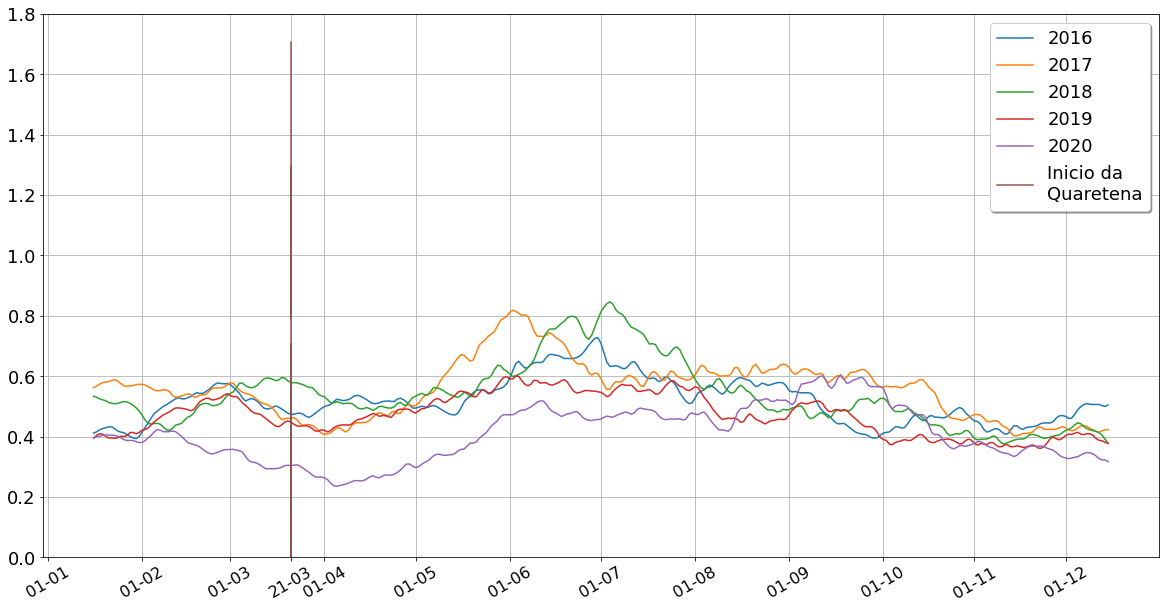

In [50]:
plt.figure(figsize=(20,10))

x = ccesar_16.index
# plt.title('Tendência da base Cerqueira Cesar',fontsize=20)
ccesar_16_decompose.trend.plot();
ccesar_17_decompose.trend.plot();
ccesar_18_decompose.trend.plot();
ccesar_19_decompose.trend.plot();
ccesar_20_decompose.trend.plot();

plt.plot([80 for i in range(pinheiros_20.round(2).mean(axis='columns').unique().shape[0])],
         pinheiros_20.round(2).mean(axis='columns').unique(),label='Inicio da quaretena')

plt.xticks(size = 16)
plt.yticks(size = 18)
plt.ylim(0.0, 1.8)

plt.xticks([0, 31, 60, 80, 91, 121,
            152, 182, 213, 244, 275, 305,
            335],
           ['01-01','01-02','01-03','21-03','01-04','01-05',
            '01-06','01-07','01-08','01-09','01-10','01-11',
            '01-12'],
           rotation=30)

plt.legend(['2016','2017','2018','2019','2020','Inicio da\nQuaretena'], loc='best', fontsize = 18, shadow=True)

plt.grid()
plt.show()

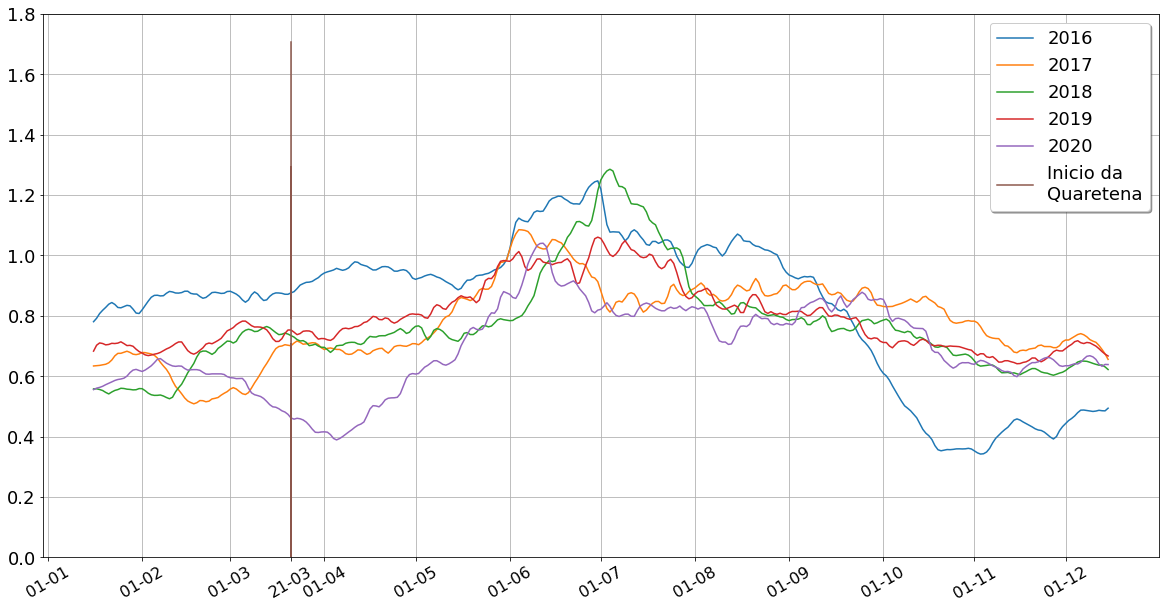

In [51]:
plt.figure(figsize=(20,10))
x = ccesar_16.index
# plt.title('Tendência da base Congonhas',fontsize=20)
congonhas_16_decompose.trend.plot();
congonhas_17_decompose.trend.plot();
congonhas_18_decompose.trend.plot();
congonhas_19_decompose.trend.plot();
congonhas_20_decompose.trend.plot();
plt.plot([80 for i in range(pinheiros_20.round(2).mean(axis='columns').unique().shape[0])],
         pinheiros_20.round(2).mean(axis='columns').unique(),label='Inicio da quaretena')

plt.xticks(size = 16)
plt.yticks(size = 18)
plt.ylim(0.0, 1.8)

plt.xticks([0, 31, 60, 80, 91, 121,
            152, 182, 213, 244, 275, 305,
            335],
           ['01-01','01-02','01-03','21-03','01-04','01-05',
            '01-06','01-07','01-08','01-09','01-10','01-11',
            '01-12'],
           rotation=30)

plt.legend(['2016','2017','2018','2019','2020','Inicio da\nQuaretena'], loc='best', fontsize = 18, shadow=True)

plt.grid()
plt.show()

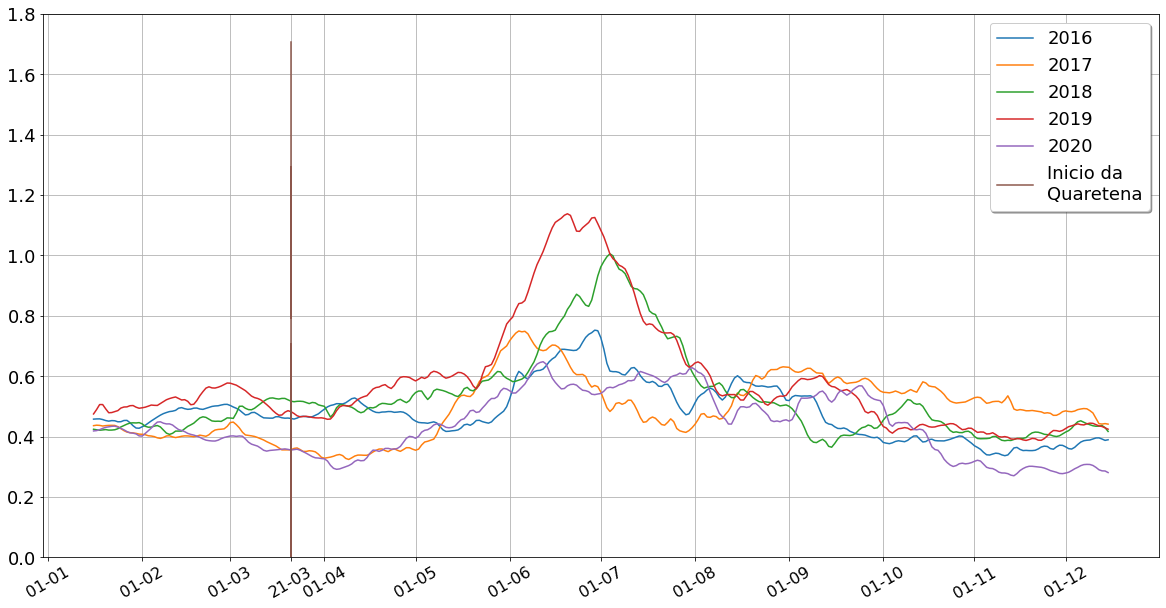

In [52]:
plt.figure(figsize=(20,10))
# plt.title('Tendência da base Mooca',fontsize=20)
mooca_16_decompose.trend.plot()
mooca_17_decompose.trend.plot()
mooca_18_decompose.trend.plot()
mooca_19_decompose.trend.plot()
mooca_20_decompose.trend.plot()
plt.plot([80 for i in range(pinheiros_20.round(2).mean(axis='columns').unique().shape[0])],
         pinheiros_20.round(2).mean(axis='columns').unique(),label='Inicio da quaretena')

plt.xticks(size = 16)
plt.yticks(size = 18)
plt.ylim(0.0, 1.8)

plt.xticks([0, 31, 60, 80, 91, 121,
            152, 182, 213, 244, 275, 305,
            335],
           ['01-01','01-02','01-03','21-03','01-04','01-05',
            '01-06','01-07','01-08','01-09','01-10','01-11',
            '01-12'],
           rotation=30)

plt.legend(['2016','2017','2018','2019','2020','Inicio da\nQuaretena'], loc='best', fontsize = 18, shadow=True)

plt.grid()
plt.show()

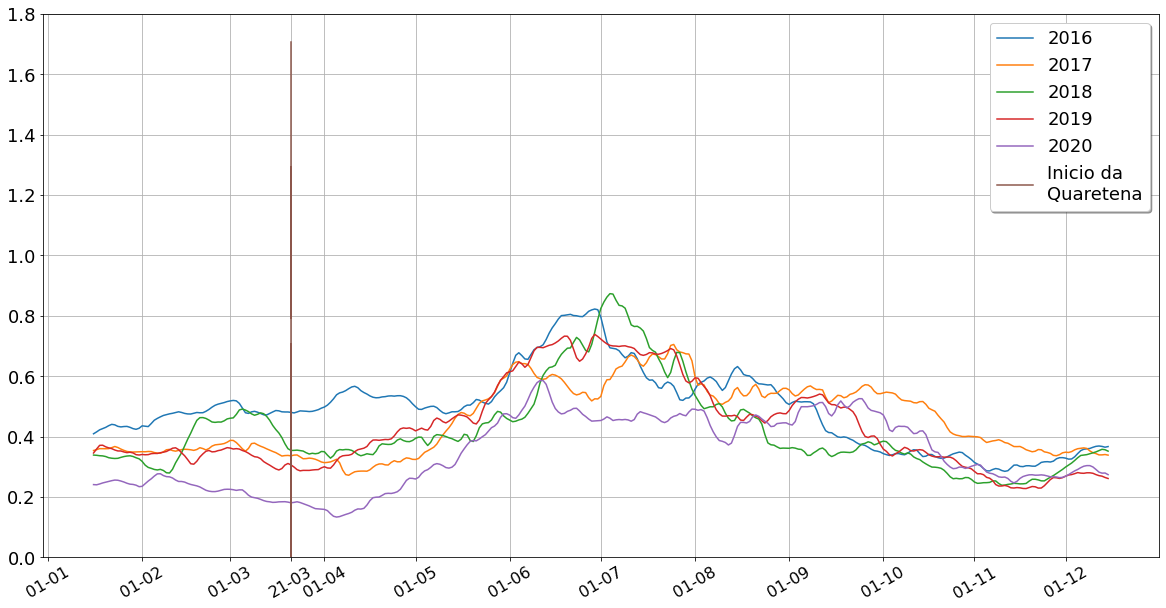

In [53]:
plt.figure(figsize=(20,10))
# plt.title('Tendência da base Parque Pedro II',fontsize=20)
ppredo_16_decompose.trend.plot();
ppredo_17_decompose.trend.plot();
ppredo_18_decompose.trend.plot();
ppredo_19_decompose.trend.plot();
ppredo_20_decompose.trend.plot();
plt.plot([80 for i in range(pinheiros_20.round(2).mean(axis='columns').unique().shape[0])],
         pinheiros_20.round(2).mean(axis='columns').unique(),label='Inicio da quaretena')

plt.xticks(size = 16)
plt.yticks(size = 18)
plt.ylim(0.0, 1.8)

plt.xticks([0, 31, 60, 80, 91, 121,
            152, 182, 213, 244, 275, 305,
            335],
           ['01-01','01-02','01-03','21-03','01-04','01-05',
            '01-06','01-07','01-08','01-09','01-10','01-11',
            '01-12'],
           rotation=30)

plt.legend(['2016','2017','2018','2019','2020','Inicio da\nQuaretena'], loc='best', fontsize = 18, shadow=True)

plt.grid()
plt.show()

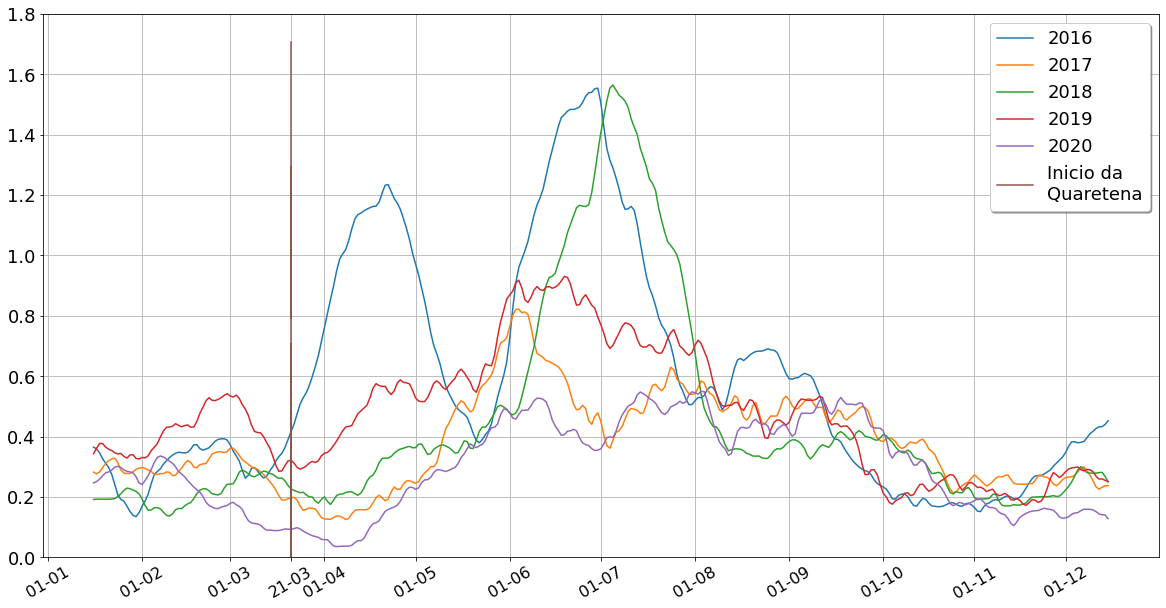

In [54]:
plt.figure(figsize=(20,10))
# plt.title('Tendência da base Pinheiros',fontsize=20)
pinheiros_16_decompose.trend.plot()
pinheiros_17_decompose.trend.plot()
pinheiros_18_decompose.trend.plot()
pinheiros_19_decompose.trend.plot()
pinheiros_20_decompose.trend.plot()
plt.plot([80 for i in range(pinheiros_20.round(2).mean(axis='columns').unique().shape[0])],
         pinheiros_20.round(2).mean(axis='columns').unique(),label='Inicio da quaretena')

plt.xticks(size = 16)
plt.yticks(size = 18)
plt.ylim(0.0, 1.8)

plt.xticks([0, 31, 60, 80, 91, 121,
            152, 182, 213, 244, 275, 305,
            335],
           ['01-01','01-02','01-03','21-03','01-04','01-05',
            '01-06','01-07','01-08','01-09','01-10','01-11',
            '01-12'],
           rotation=30)

plt.legend(['2016','2017','2018','2019','2020','Inicio da\nQuaretena'], loc='best', fontsize = 18, shadow=True)

plt.grid()
plt.show()

Com os gráficos de tendência da séries temporais mostra que o comércio teve impacto já antes do anúcio da quaretena, mais especificamente por volta do dia 6 e 8 de fevereiro, após anúcio da quarentena que no dia 21 de março, o efeito foi ainda maior onde pode ver que os valores de gás cabornico não os menores do periodo, isso continua até por do dia 06 e 08 de abril onde pode perceber um 'cotovelo' nos gráficos, logos após esses dias houve aumento na emissão de gases que indica a recuperação de comércio.

<div style='border-top: 2px solid red;'></div>

# 4.4 Sazonalidade dos 7 meses

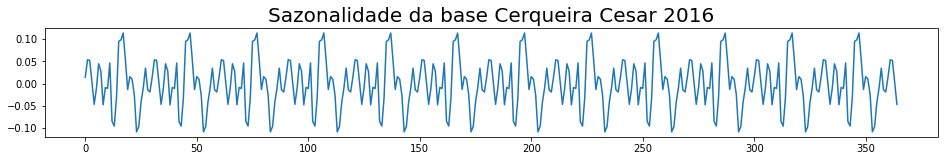

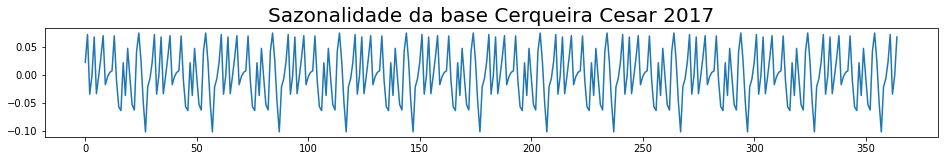

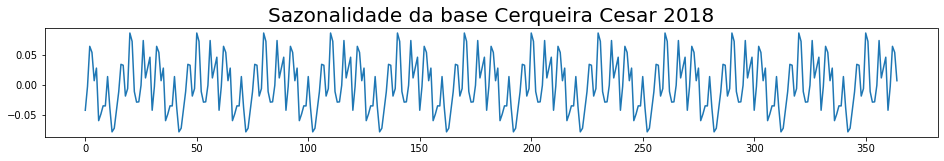

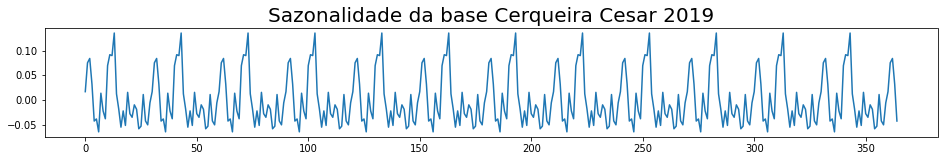

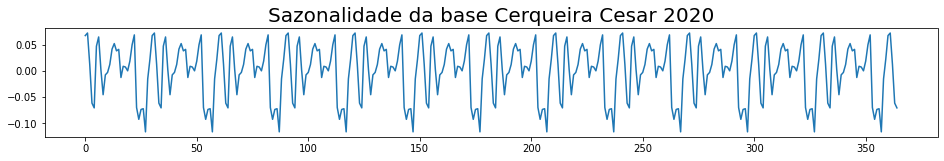

In [55]:
plt.figure(figsize=(16,2))
plt.title('Sazonalidade da base Cerqueira Cesar 2016',fontsize=20)
ccesar_16_decompose.seasonal.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Sazonalidade da base Cerqueira Cesar 2017',fontsize=20)
ccesar_17_decompose.seasonal.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Sazonalidade da base Cerqueira Cesar 2018',fontsize=20)
ccesar_18_decompose.seasonal.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Sazonalidade da base Cerqueira Cesar 2019',fontsize=20)
ccesar_19_decompose.seasonal.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Sazonalidade da base Cerqueira Cesar 2020',fontsize=20)
ccesar_20_decompose.seasonal.plot()
plt.show()

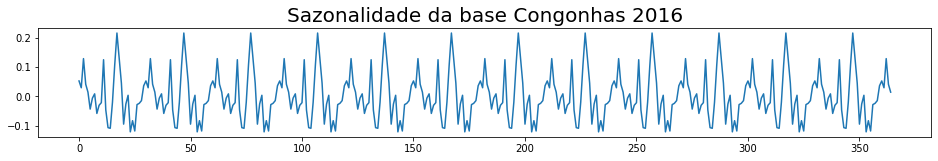

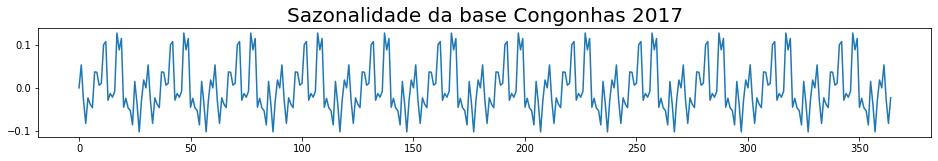

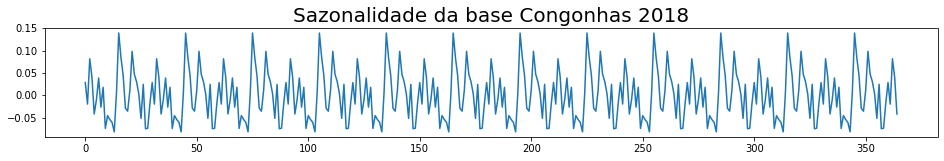

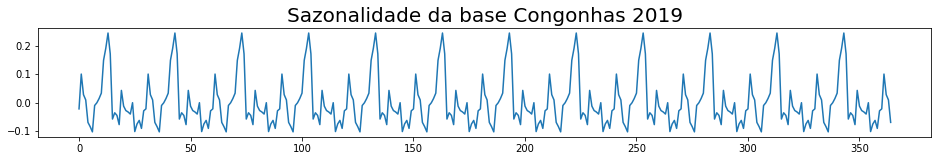

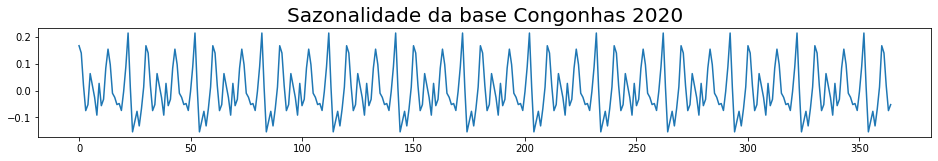

In [56]:
plt.figure(figsize=(16,2))
plt.title('Sazonalidade da base Congonhas 2016',fontsize=20)
congonhas_16_decompose.seasonal.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Sazonalidade da base Congonhas 2017',fontsize=20)
congonhas_17_decompose.seasonal.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Sazonalidade da base Congonhas 2018',fontsize=20)
congonhas_18_decompose.seasonal.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Sazonalidade da base Congonhas 2019',fontsize=20)
congonhas_19_decompose.seasonal.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Sazonalidade da base Congonhas 2020',fontsize=20)
congonhas_20_decompose.seasonal.plot()
plt.show()

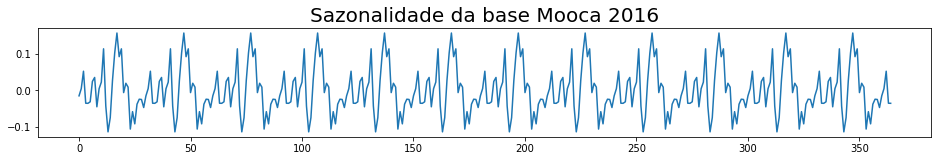

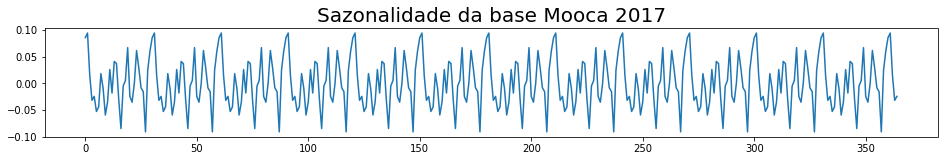

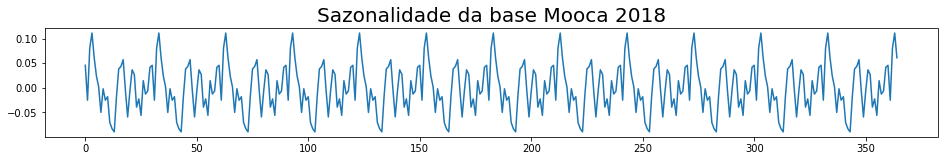

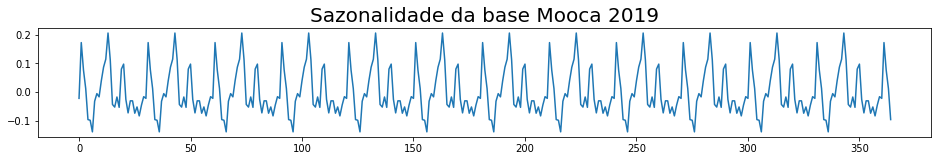

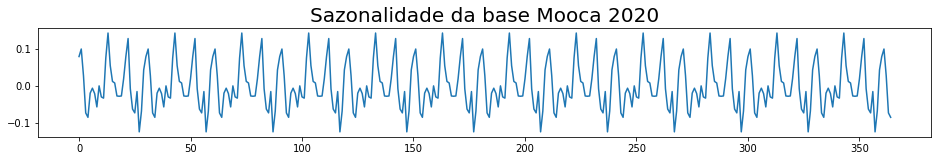

In [57]:
plt.figure(figsize=(16,2))
plt.title('Sazonalidade da base Mooca 2016',fontsize=20)
mooca_16_decompose.seasonal.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Sazonalidade da base Mooca 2017',fontsize=20)
mooca_17_decompose.seasonal.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Sazonalidade da base Mooca 2018',fontsize=20)
mooca_18_decompose.seasonal.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Sazonalidade da base Mooca 2019',fontsize=20)
mooca_19_decompose.seasonal.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Sazonalidade da base Mooca 2020',fontsize=20)
mooca_20_decompose.seasonal.plot()
plt.show()

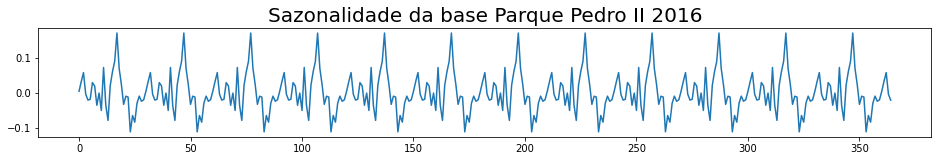

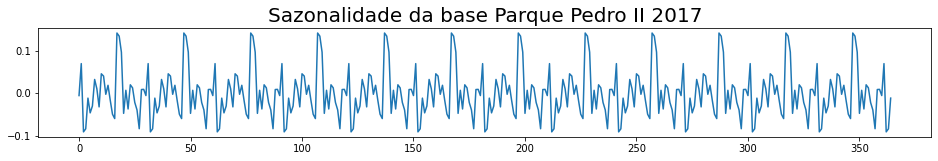

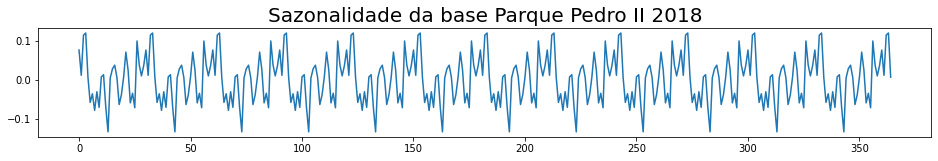

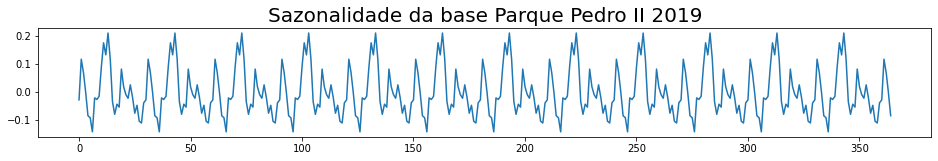

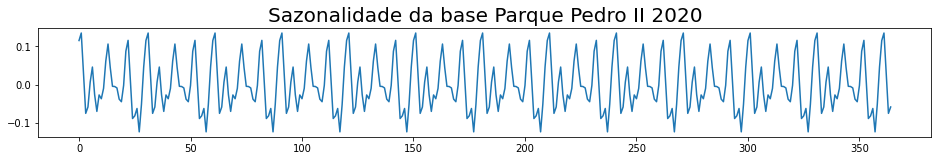

In [58]:
plt.figure(figsize=(16,2))
plt.title('Sazonalidade da base Parque Pedro II 2016',fontsize=20)
ppredo_16_decompose.seasonal.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Sazonalidade da base Parque Pedro II 2017',fontsize=20)
ppredo_17_decompose.seasonal.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Sazonalidade da base Parque Pedro II 2018',fontsize=20)
ppredo_18_decompose.seasonal.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Sazonalidade da base Parque Pedro II 2019',fontsize=20)
ppredo_19_decompose.seasonal.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Sazonalidade da base Parque Pedro II 2020',fontsize=20)
ppredo_20_decompose.seasonal.plot()
plt.show()

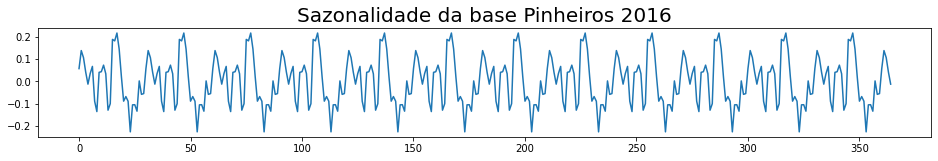

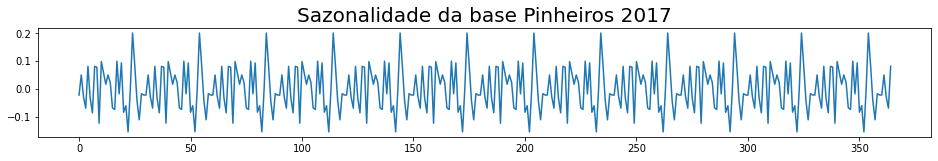

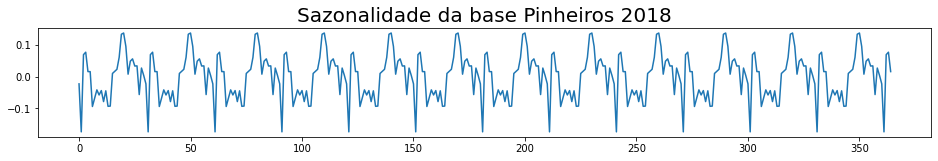

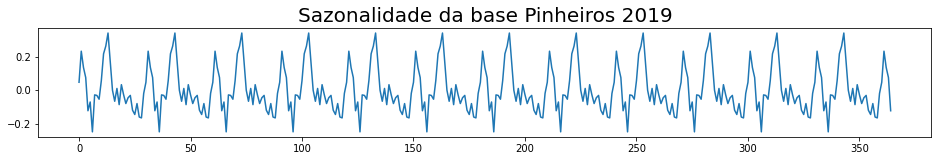

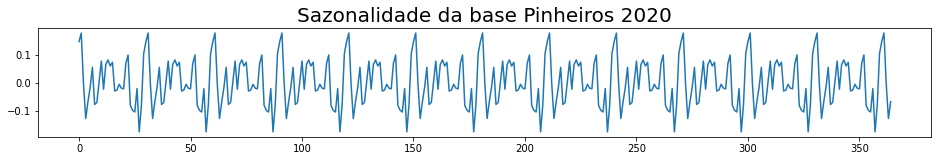

In [59]:
plt.figure(figsize=(16,2))
plt.title('Sazonalidade da base Pinheiros 2016',fontsize=20)
pinheiros_16_decompose.seasonal.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Sazonalidade da base Pinheiros 2017',fontsize=20)
pinheiros_17_decompose.seasonal.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Sazonalidade da base Pinheiros 2018',fontsize=20)
pinheiros_18_decompose.seasonal.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Sazonalidade da base Pinheiros 2019',fontsize=20)
pinheiros_19_decompose.seasonal.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Sazonalidade da base Pinheiros 2020',fontsize=20)
pinheiros_20_decompose.seasonal.plot()
plt.show()

# 4.5 Resíduos dos 7 meses

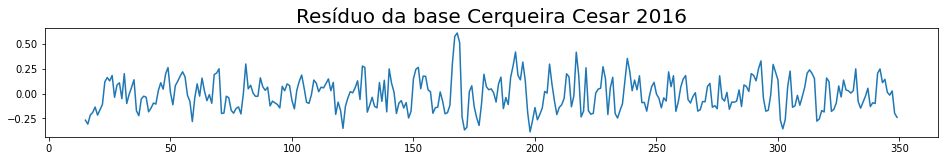

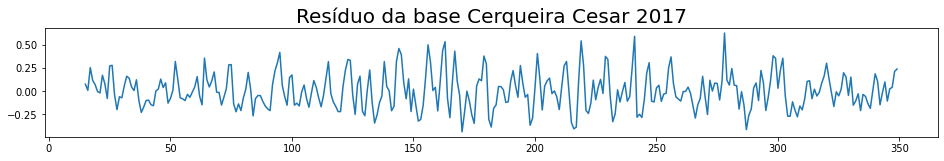

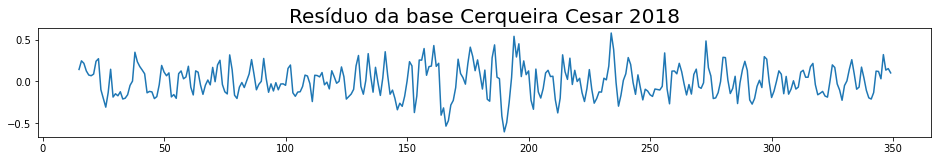

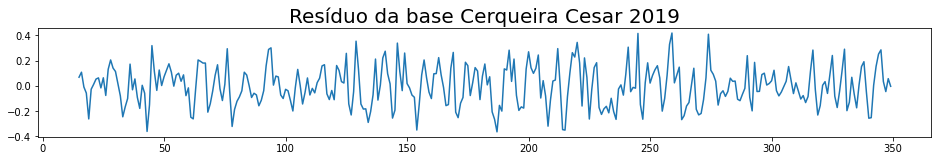

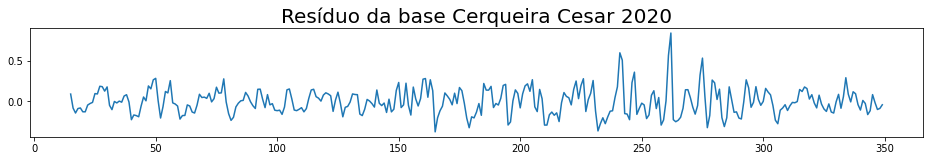

In [61]:
plt.figure(figsize=(16,2))
plt.title('Resíduo da base Cerqueira Cesar 2016',fontsize=20)
ccesar_16_decompose.resid.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Resíduo da base Cerqueira Cesar 2017',fontsize=20)
ccesar_17_decompose.resid.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Resíduo da base Cerqueira Cesar 2018',fontsize=20)
ccesar_18_decompose.resid.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Resíduo da base Cerqueira Cesar 2019',fontsize=20)
ccesar_19_decompose.resid.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Resíduo da base Cerqueira Cesar 2020',fontsize=20)
ccesar_20_decompose.resid.plot()
plt.show()

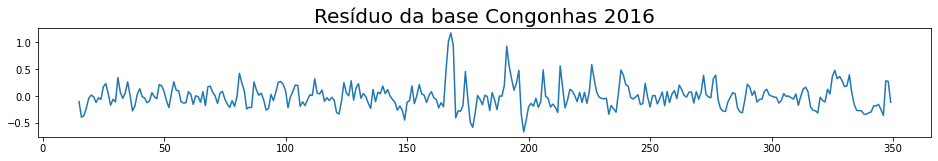

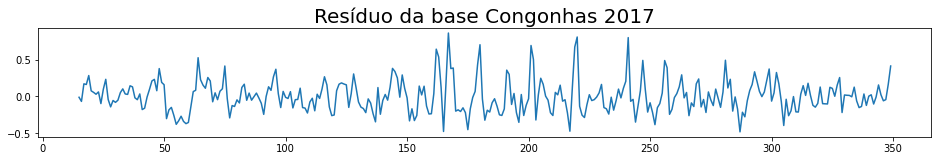

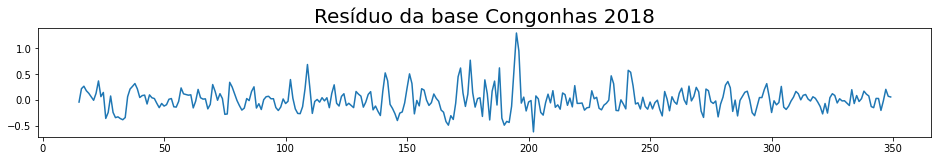

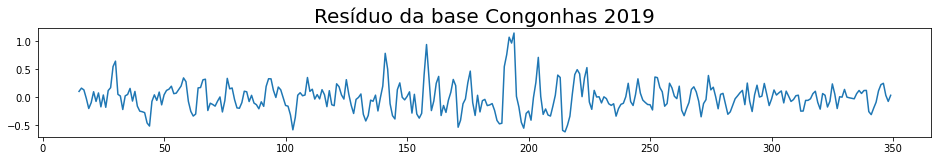

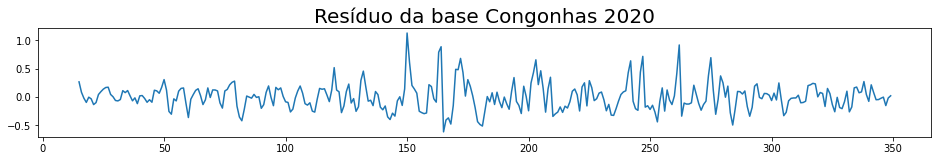

In [62]:
plt.figure(figsize=(16,2))
plt.title('Resíduo da base Congonhas 2016',fontsize=20)
congonhas_16_decompose.resid.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Resíduo da base Congonhas 2017',fontsize=20)
congonhas_17_decompose.resid.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Resíduo da base Congonhas 2018',fontsize=20)
congonhas_18_decompose.resid.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Resíduo da base Congonhas 2019',fontsize=20)
congonhas_19_decompose.resid.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Resíduo da base Congonhas 2020',fontsize=20)
congonhas_20_decompose.resid.plot()
plt.show()

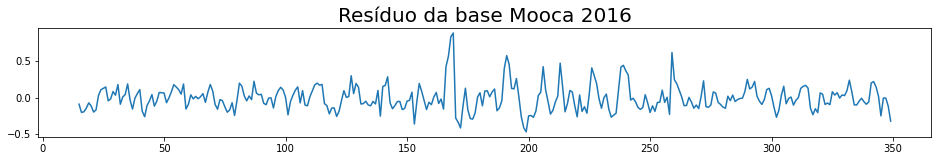

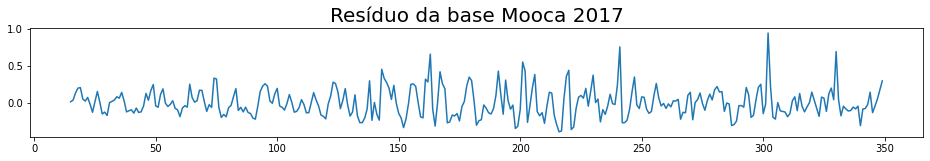

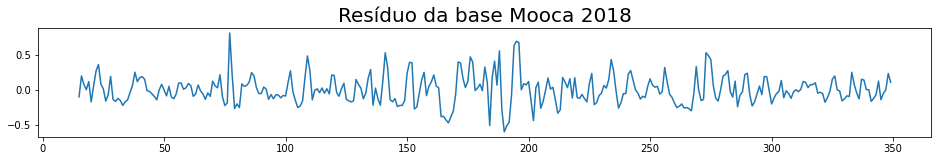

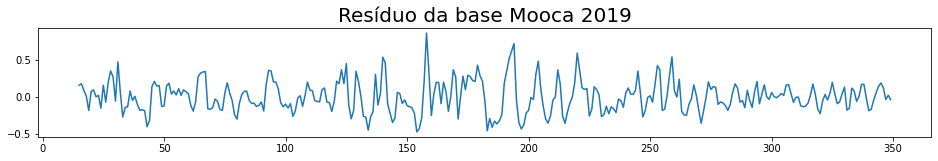

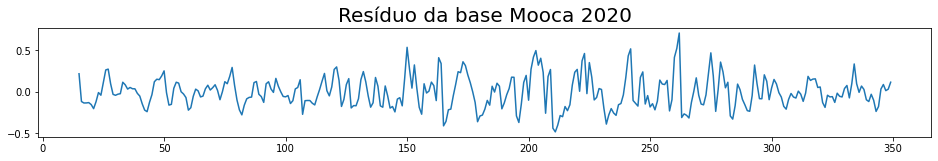

In [63]:
plt.figure(figsize=(16,2))
plt.title('Resíduo da base Mooca 2016',fontsize=20)
mooca_16_decompose.resid.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Resíduo da base Mooca 2017',fontsize=20)
mooca_17_decompose.resid.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Resíduo da base Mooca 2018',fontsize=20)
mooca_18_decompose.resid.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Resíduo da base Mooca 2019',fontsize=20)
mooca_19_decompose.resid.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Resíduo da base Mooca 2020',fontsize=20)
mooca_20_decompose.resid.plot()
plt.show()

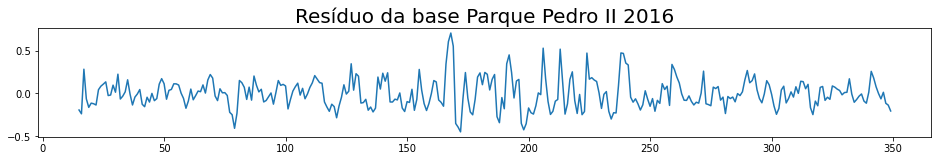

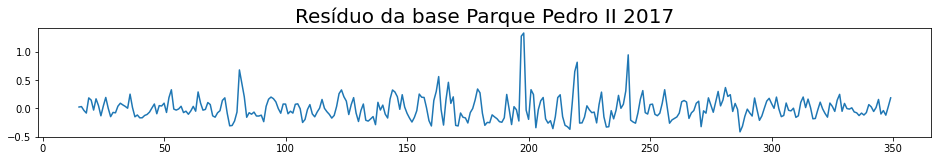

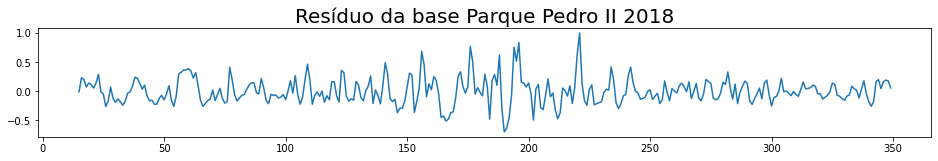

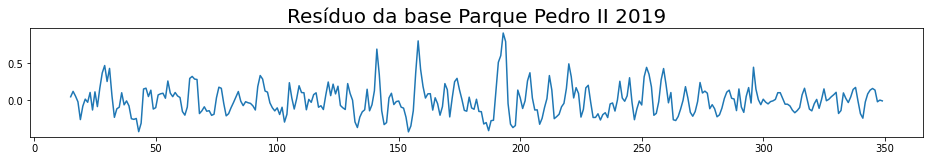

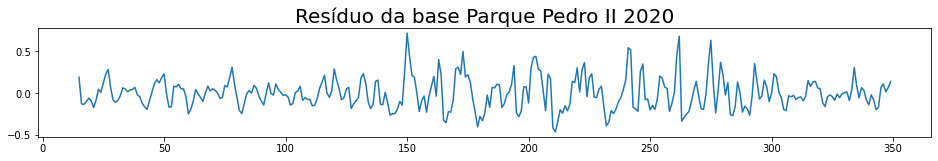

In [64]:
plt.figure(figsize=(16,2))
plt.title('Resíduo da base Parque Pedro II 2016',fontsize=20)
ppredo_16_decompose.resid.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Resíduo da base Parque Pedro II 2017',fontsize=20)
ppredo_17_decompose.resid.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Resíduo da base Parque Pedro II 2018',fontsize=20)
ppredo_18_decompose.resid.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Resíduo da base Parque Pedro II 2019',fontsize=20)
ppredo_19_decompose.resid.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Resíduo da base Parque Pedro II 2020',fontsize=20)
ppredo_20_decompose.resid.plot()
plt.show()

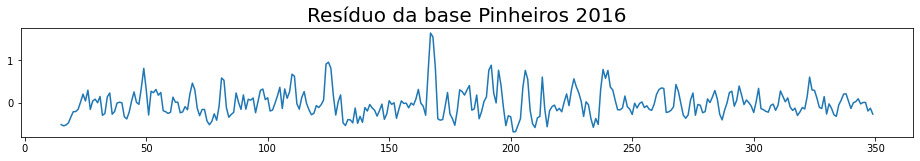

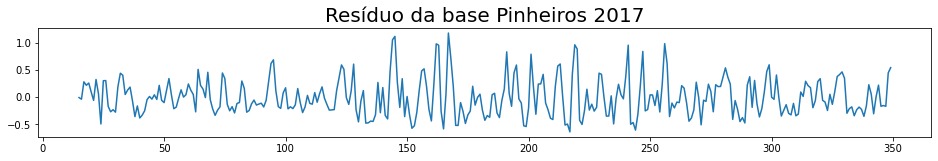

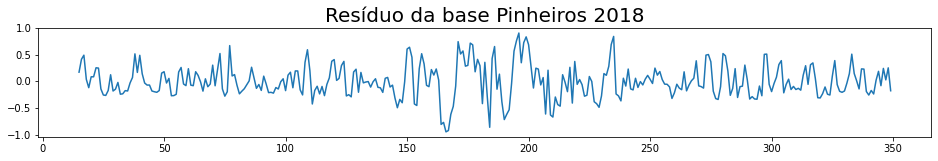

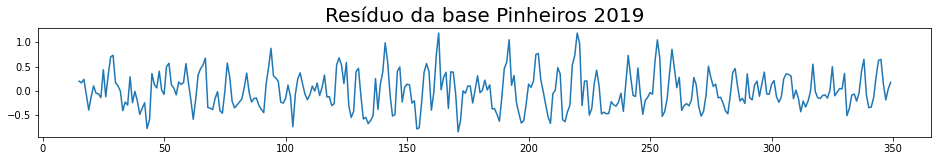

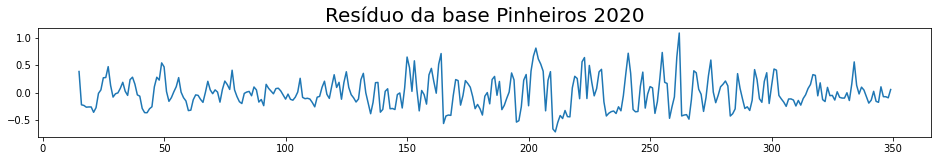

In [65]:
plt.figure(figsize=(16,2))
plt.title('Resíduo da base Pinheiros 2016',fontsize=20)
pinheiros_16_decompose.resid.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Resíduo da base Pinheiros 2017',fontsize=20)
pinheiros_17_decompose.resid.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Resíduo da base Pinheiros 2018',fontsize=20)
pinheiros_18_decompose.resid.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Resíduo da base Pinheiros 2019',fontsize=20)
pinheiros_19_decompose.resid.plot()
plt.show()

plt.figure(figsize=(16,2))
plt.title('Resíduo da base Pinheiros 2020',fontsize=20)
pinheiros_20_decompose.resid.plot()
plt.show()

# Autocorrelação

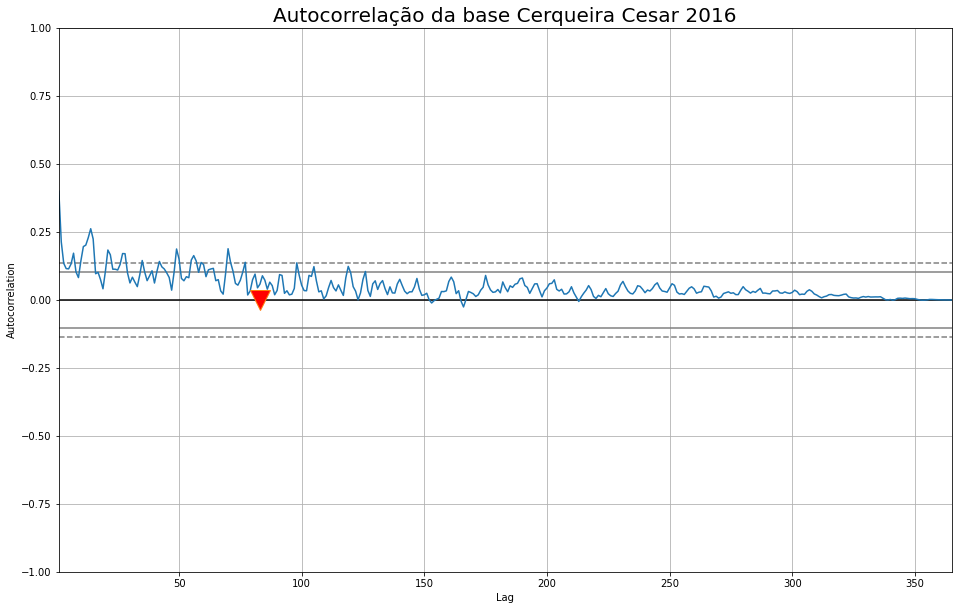

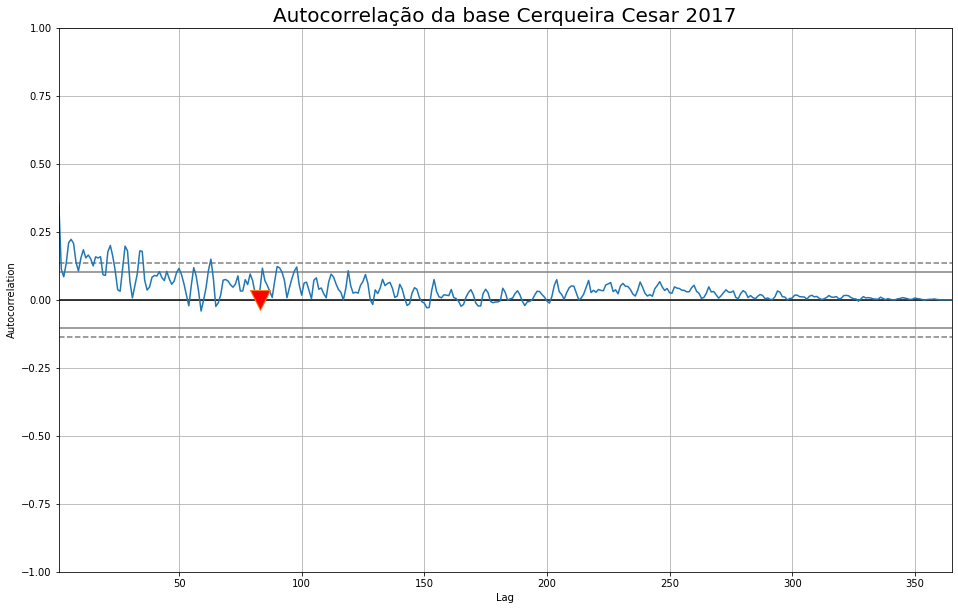

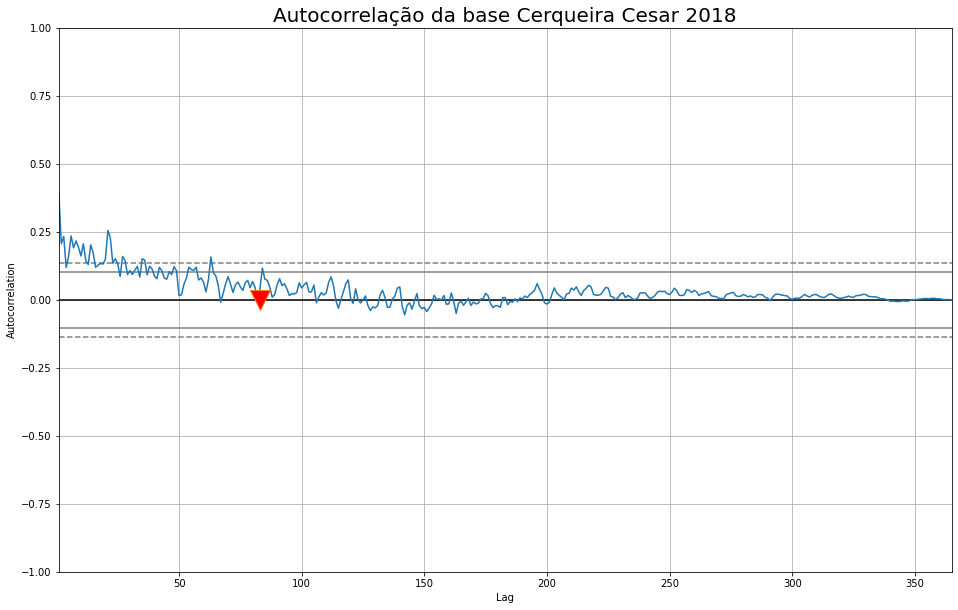

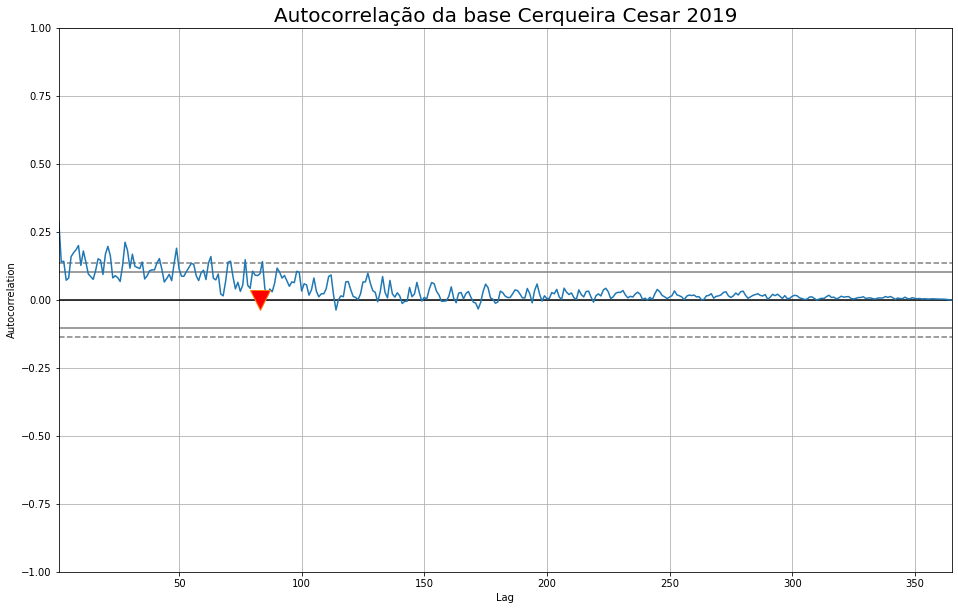

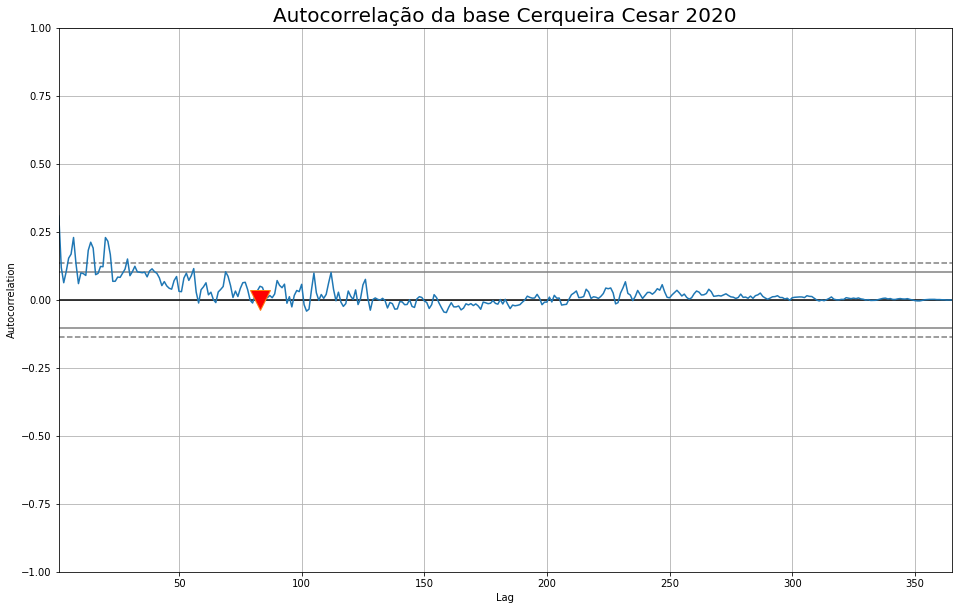

In [66]:
plt.figure(figsize=(16,10))
plt.title('Autocorrelação da base Cerqueira Cesar 2016',fontsize=20)
autocorrelation_plot(ccesar_16)
plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
plt.show()

plt.figure(figsize=(16,10))
plt.title('Autocorrelação da base Cerqueira Cesar 2017',fontsize=20)
autocorrelation_plot(ccesar_17)
plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
plt.show()

plt.figure(figsize=(16,10))
plt.title('Autocorrelação da base Cerqueira Cesar 2018',fontsize=20)
autocorrelation_plot(ccesar_18)
plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
plt.show()

plt.figure(figsize=(16,10))
plt.title('Autocorrelação da base Cerqueira Cesar 2019',fontsize=20)
autocorrelation_plot(ccesar_19)
plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
plt.show()

plt.figure(figsize=(16,10))
plt.title('Autocorrelação da base Cerqueira Cesar 2020',fontsize=20)
autocorrelation_plot(ccesar_20)
plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
plt.show()

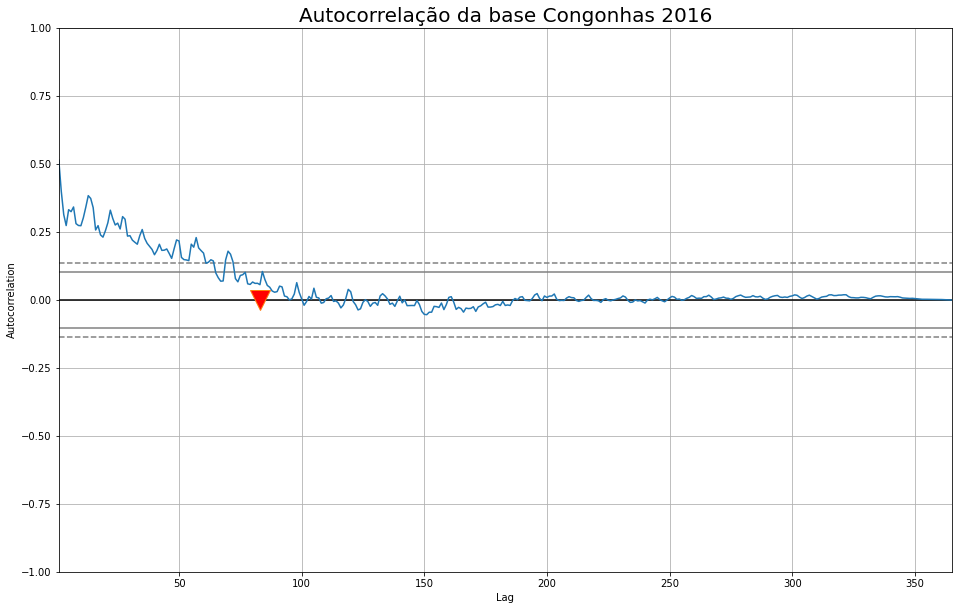

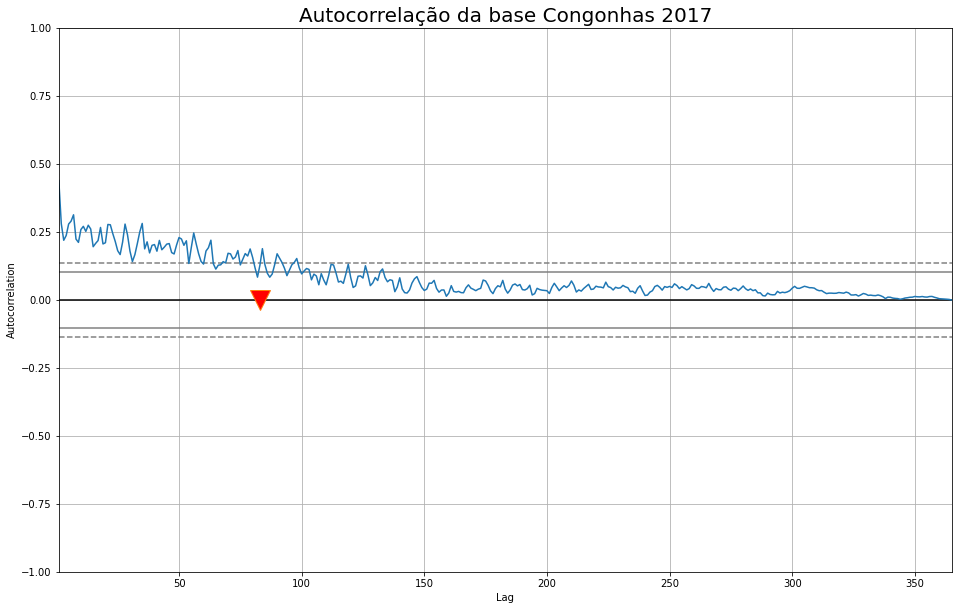

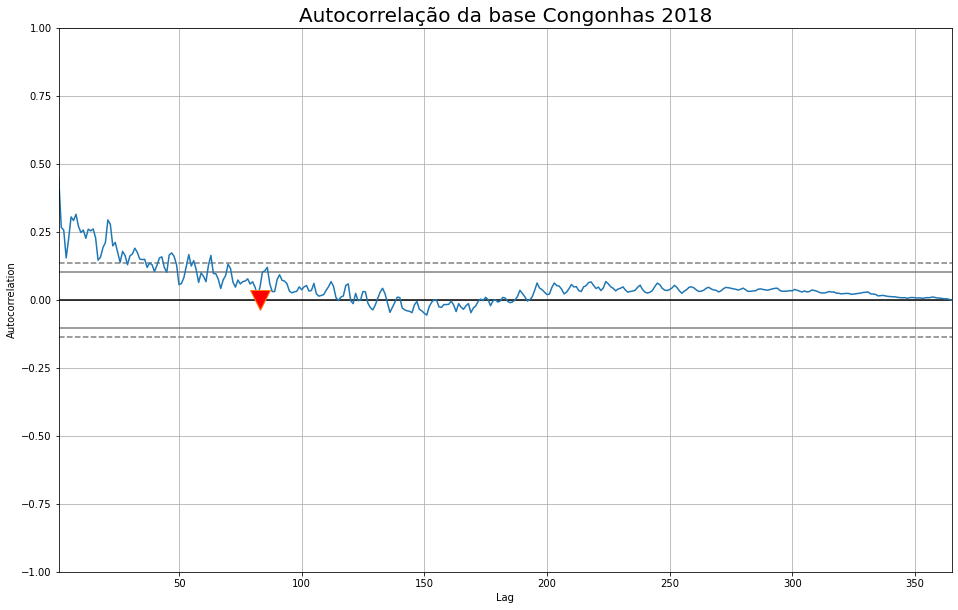

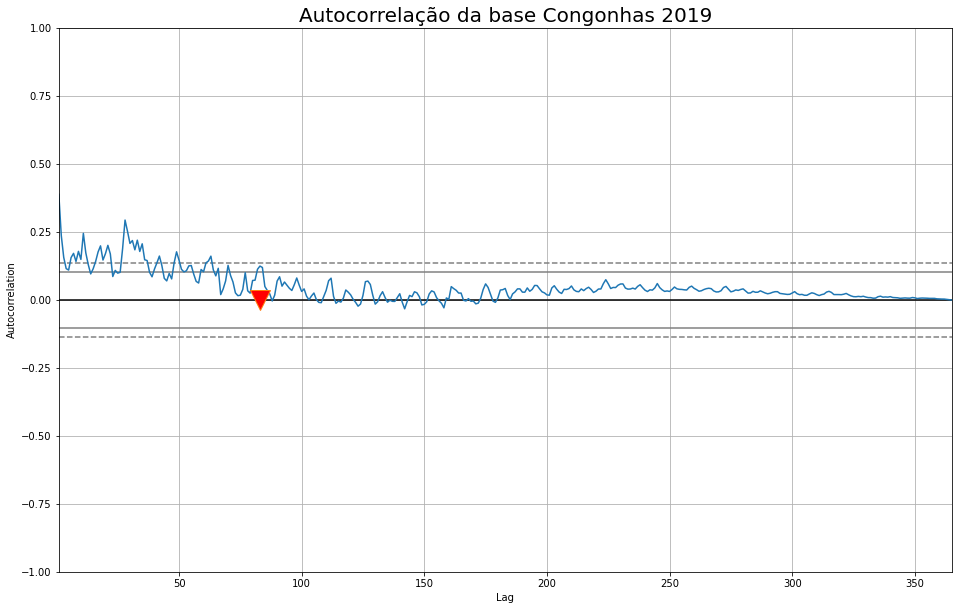

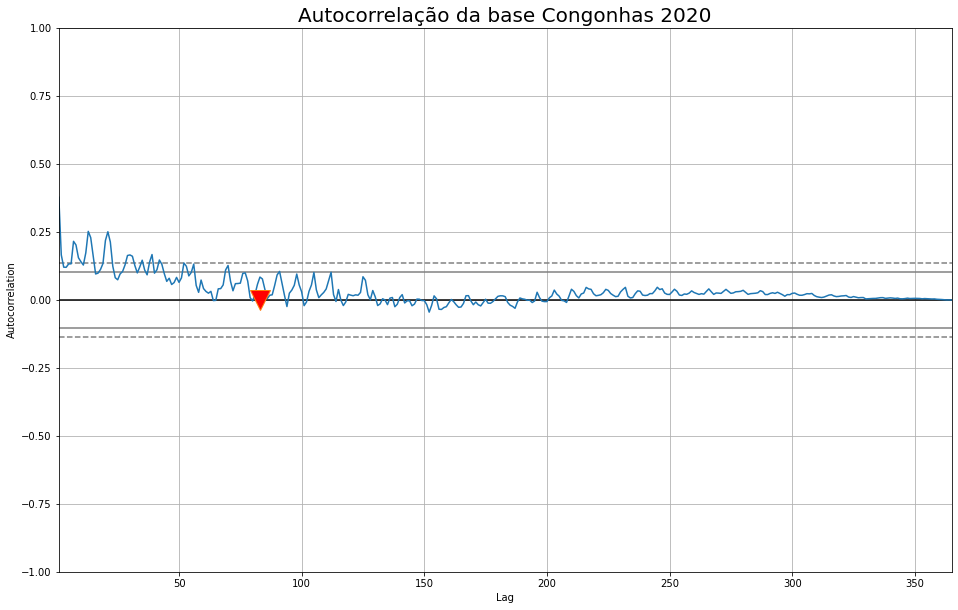

In [67]:
plt.figure(figsize=(16,10))
plt.title('Autocorrelação da base Congonhas 2016',fontsize=20)
autocorrelation_plot(congonhas_16)
plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
plt.show()

plt.figure(figsize=(16,10))
plt.title('Autocorrelação da base Congonhas 2017',fontsize=20)
autocorrelation_plot(congonhas_17)
plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
plt.show()

plt.figure(figsize=(16,10))
plt.title('Autocorrelação da base Congonhas 2018',fontsize=20)
autocorrelation_plot(congonhas_18)
plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
plt.show()

plt.figure(figsize=(16,10))
plt.title('Autocorrelação da base Congonhas 2019',fontsize=20)
autocorrelation_plot(congonhas_19)
plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
plt.show()

plt.figure(figsize=(16,10))
plt.title('Autocorrelação da base Congonhas 2020',fontsize=20)
autocorrelation_plot(congonhas_20)
plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
plt.show()

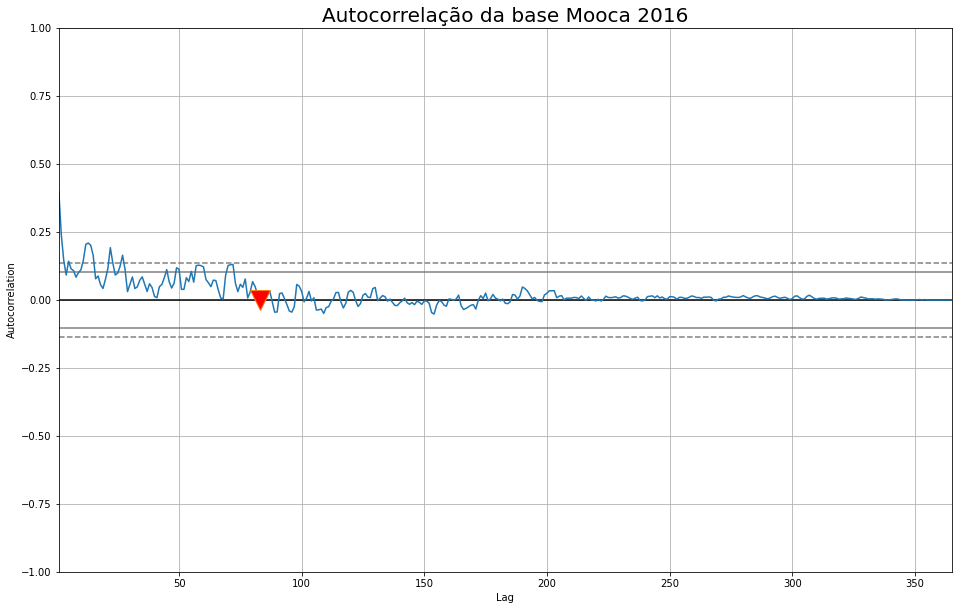

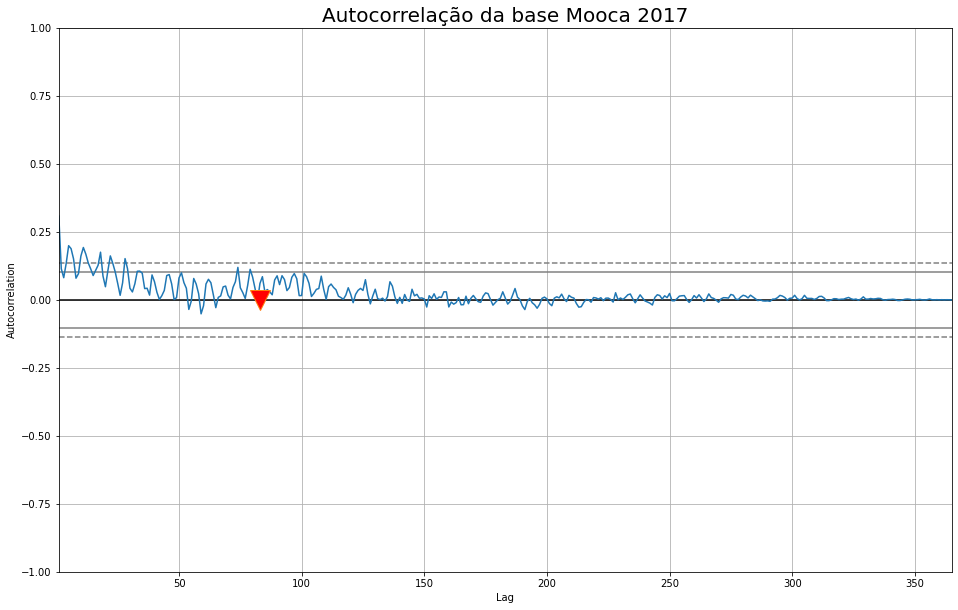

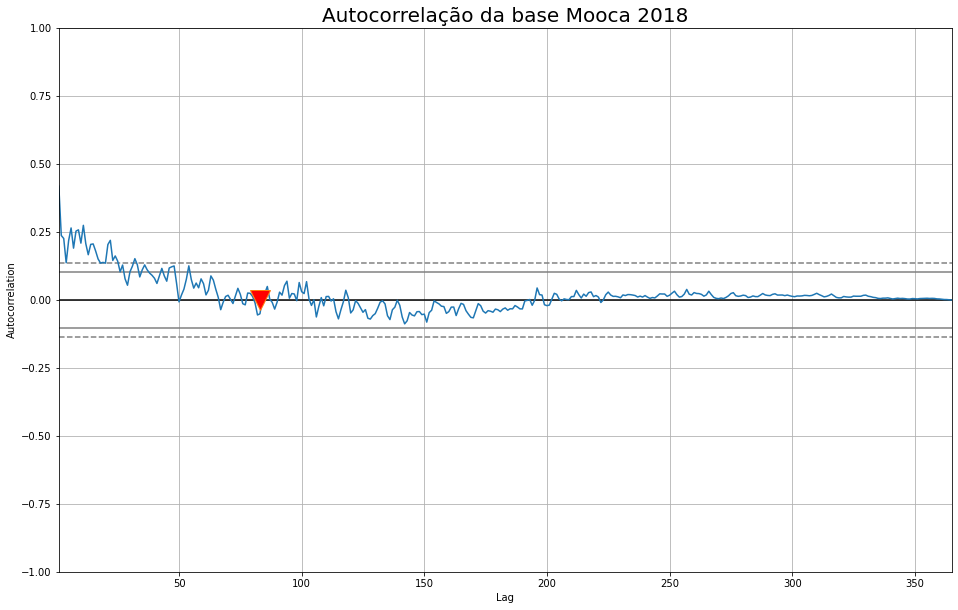

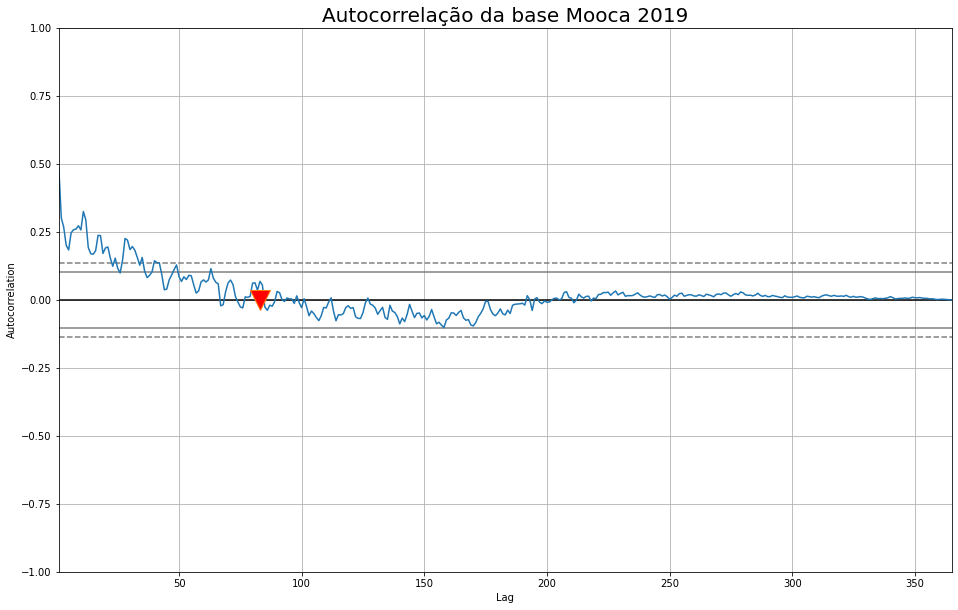

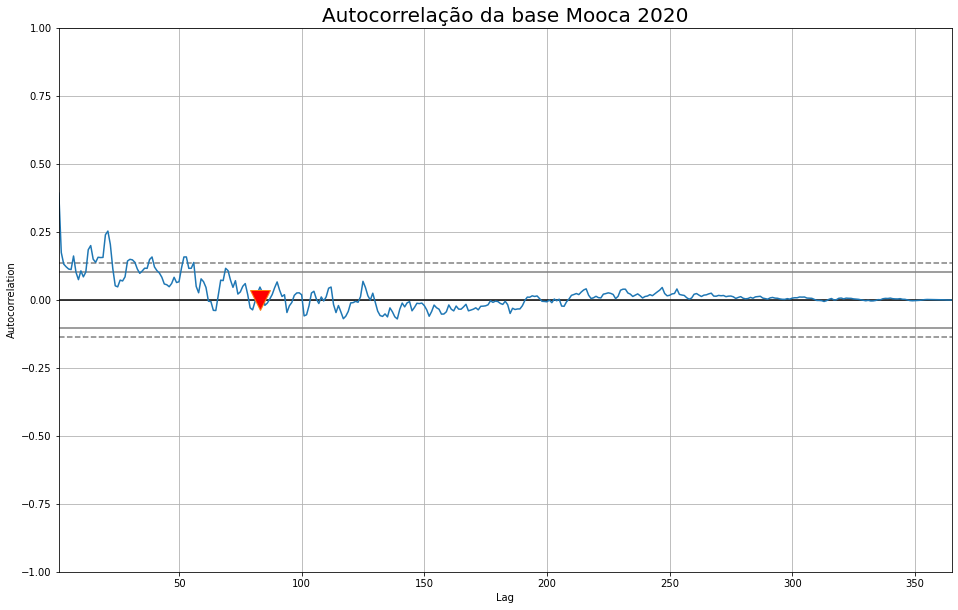

In [68]:
plt.figure(figsize=(16,10))
plt.title('Autocorrelação da base Mooca 2016',fontsize=20)
autocorrelation_plot(mooca_16)
plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
plt.show()

plt.figure(figsize=(16,10))
plt.title('Autocorrelação da base Mooca 2017',fontsize=20)
autocorrelation_plot(mooca_17)
plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
plt.show()

plt.figure(figsize=(16,10))
plt.title('Autocorrelação da base Mooca 2018',fontsize=20)
autocorrelation_plot(mooca_18)
plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
plt.show()

plt.figure(figsize=(16,10))
plt.title('Autocorrelação da base Mooca 2019',fontsize=20)
autocorrelation_plot(mooca_19)
plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
plt.show()

plt.figure(figsize=(16,10))
plt.title('Autocorrelação da base Mooca 2020',fontsize=20)
autocorrelation_plot(mooca_20)
plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
plt.show()

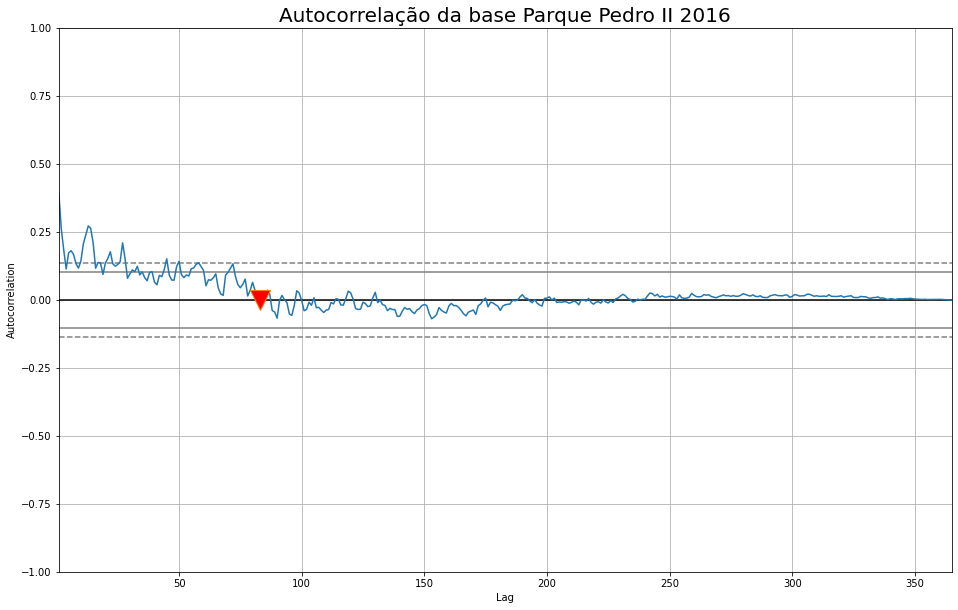

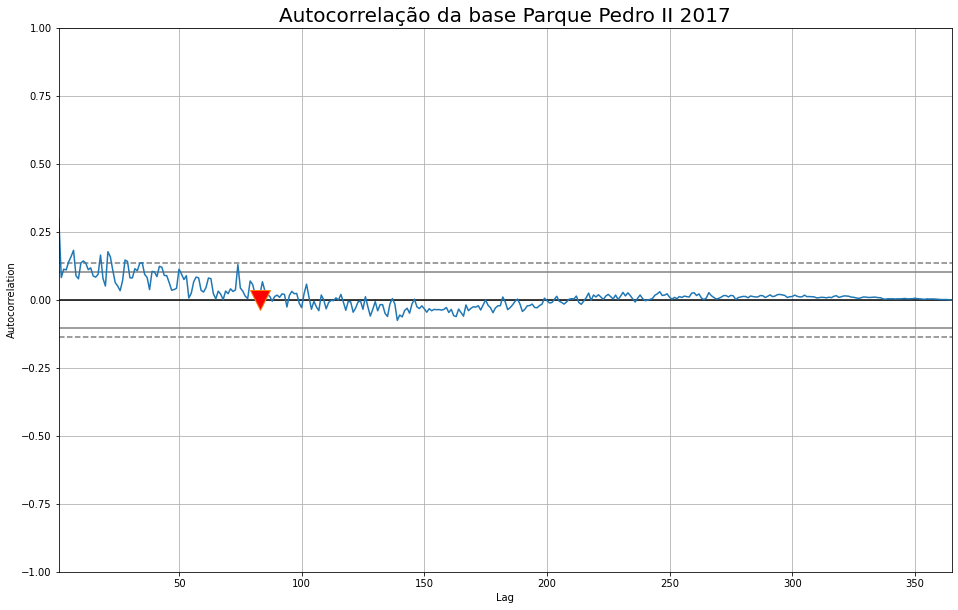

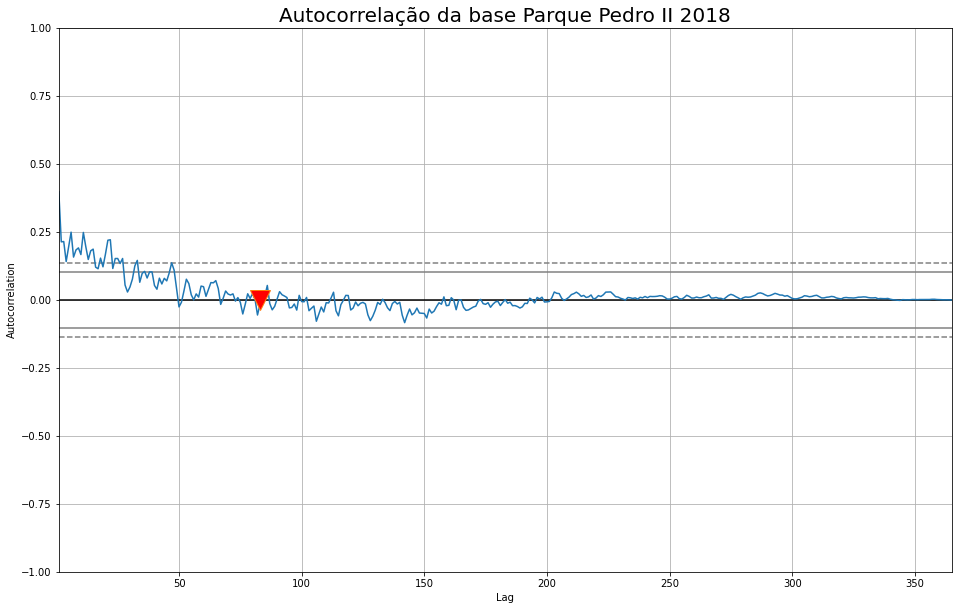

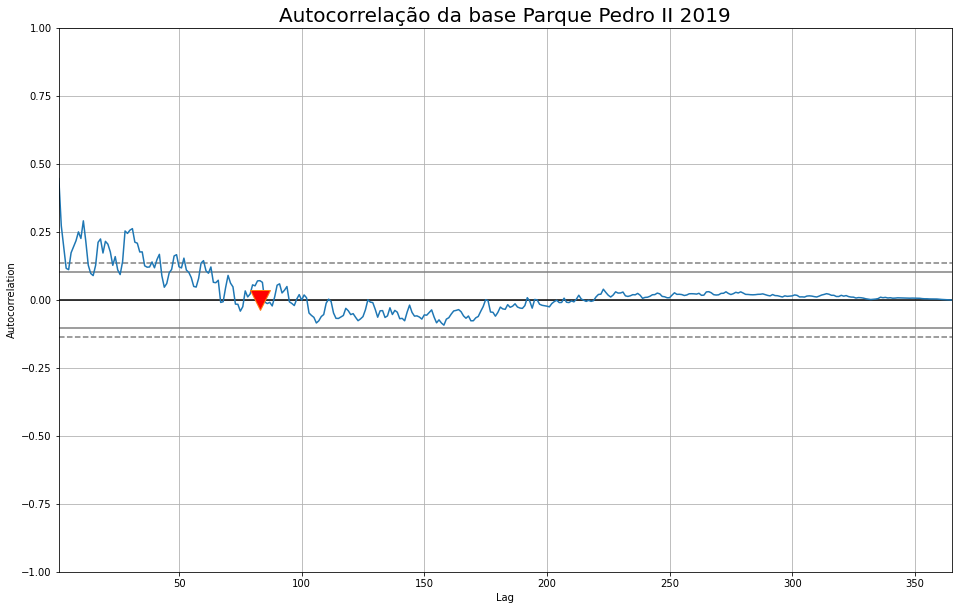

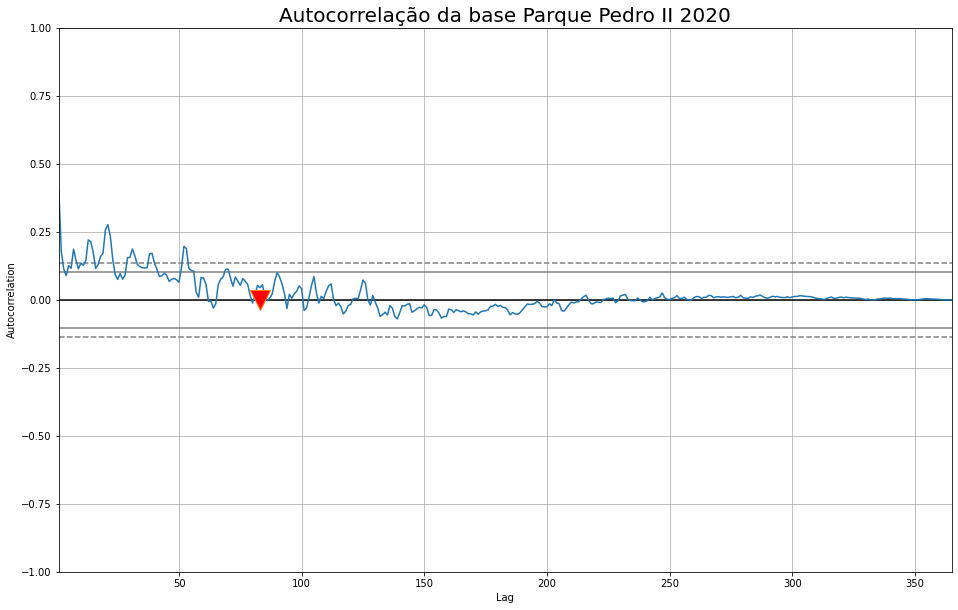

In [69]:
plt.figure(figsize=(16,10))
plt.title('Autocorrelação da base Parque Pedro II 2016',fontsize=20)
autocorrelation_plot(ppredo_16)
plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
plt.show()

plt.figure(figsize=(16,10))
plt.title('Autocorrelação da base Parque Pedro II 2017',fontsize=20)
autocorrelation_plot(ppredo_17)
plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
plt.show()

plt.figure(figsize=(16,10))
plt.title('Autocorrelação da base Parque Pedro II 2018',fontsize=20)
autocorrelation_plot(ppredo_18)
plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
plt.show()

plt.figure(figsize=(16,10))
plt.title('Autocorrelação da base Parque Pedro II 2019',fontsize=20)
autocorrelation_plot(ppredo_19)
plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
plt.show()

plt.figure(figsize=(16,10))
plt.title('Autocorrelação da base Parque Pedro II 2020',fontsize=20)
autocorrelation_plot(ppredo_20)
plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
plt.show()

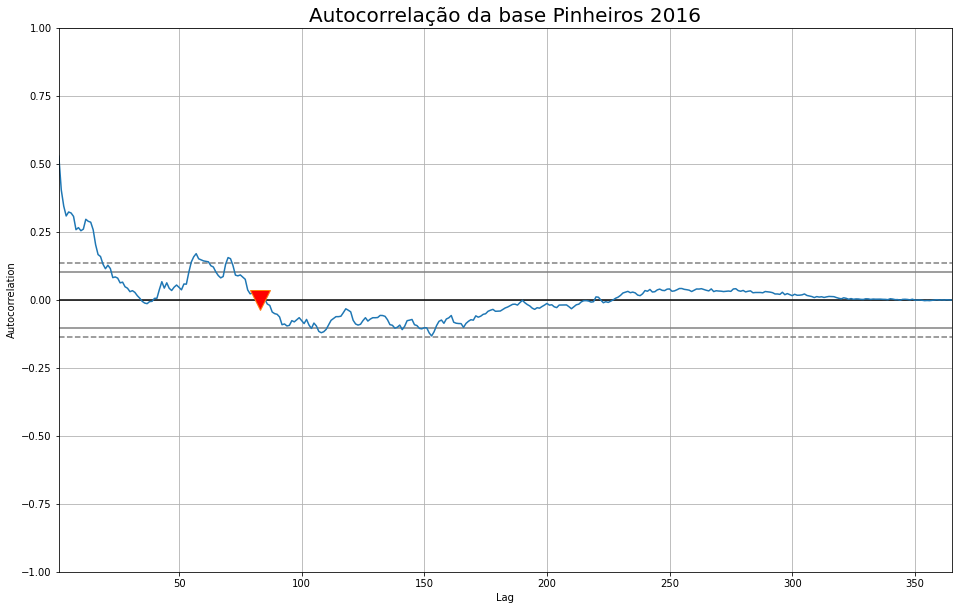

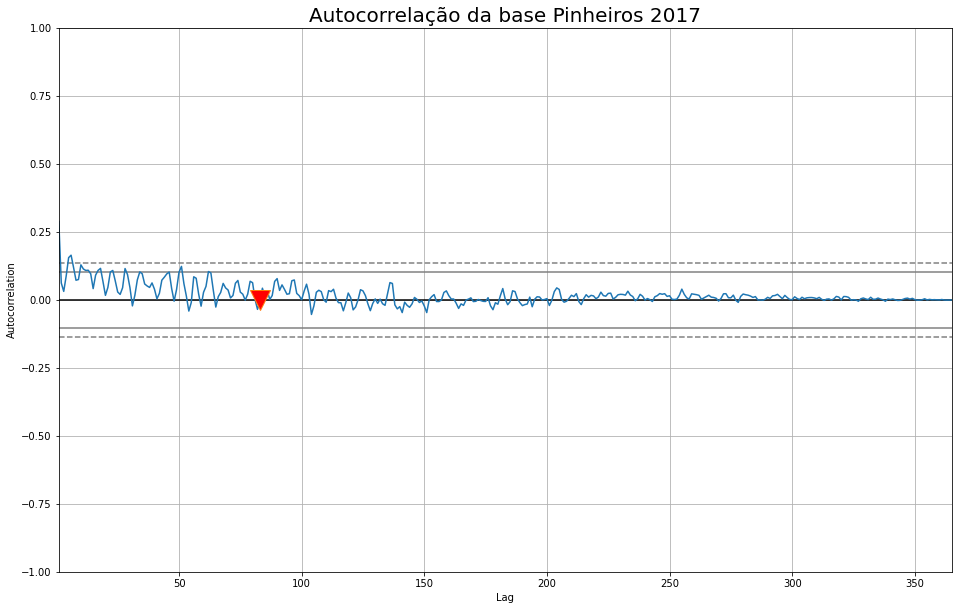

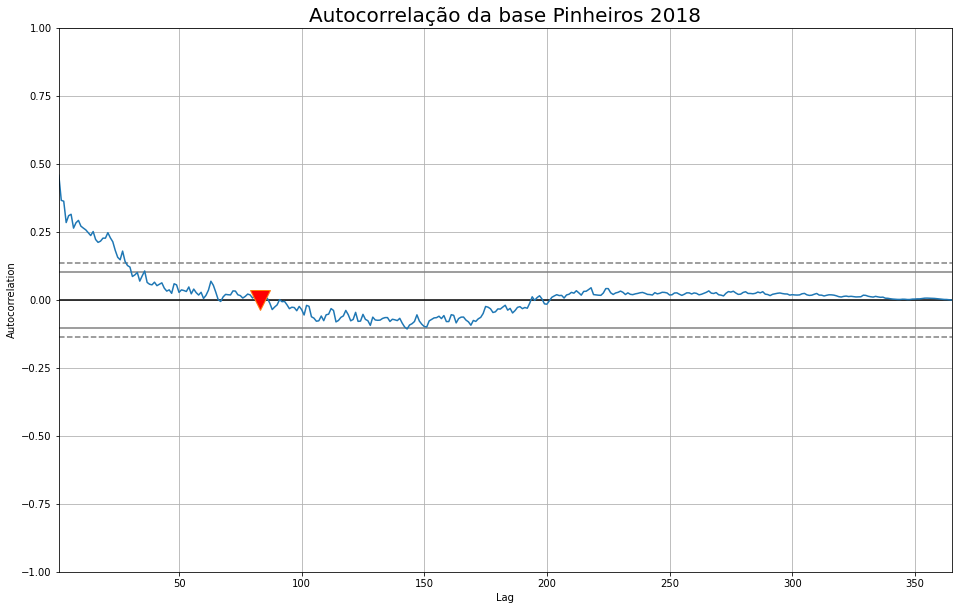

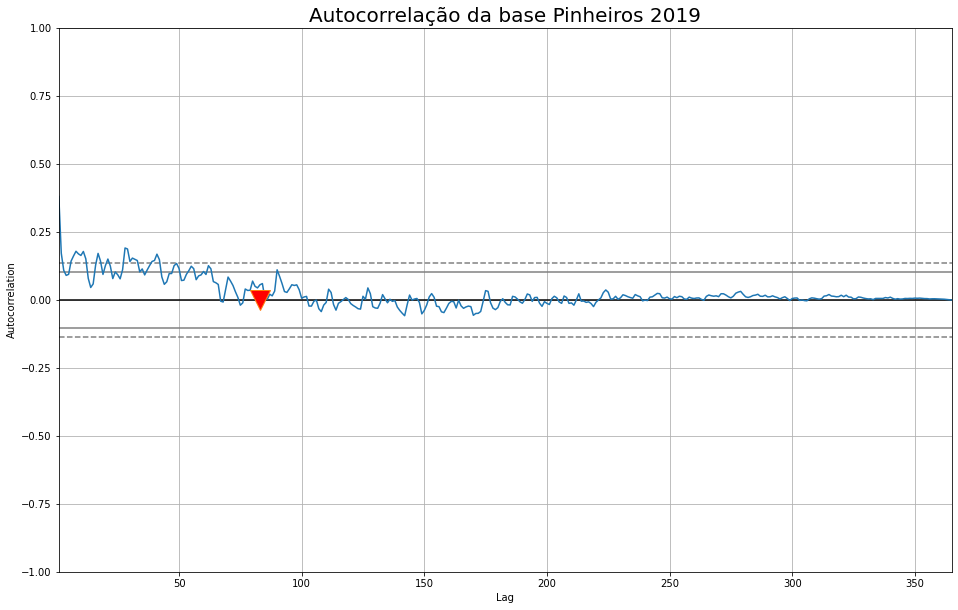

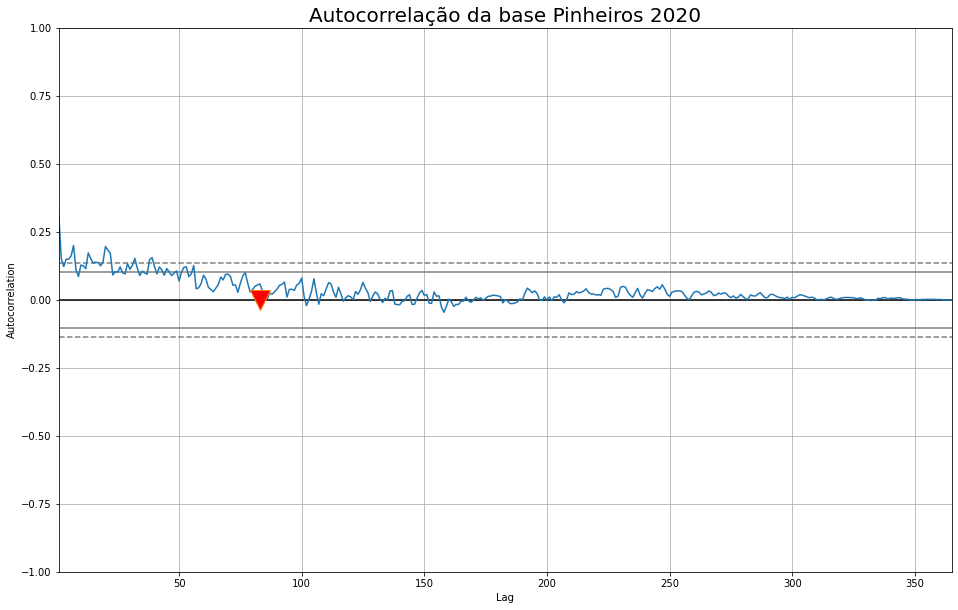

In [70]:
plt.figure(figsize=(16,10))
plt.title('Autocorrelação da base Pinheiros 2016',fontsize=20)
autocorrelation_plot(pinheiros_16)
plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
plt.show()

plt.figure(figsize=(16,10))
plt.title('Autocorrelação da base Pinheiros 2017',fontsize=20)
autocorrelation_plot(pinheiros_17)
plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
plt.show()

plt.figure(figsize=(16,10))
plt.title('Autocorrelação da base Pinheiros 2018',fontsize=20)
autocorrelation_plot(pinheiros_18)
plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
plt.show()

plt.figure(figsize=(16,10))
plt.title('Autocorrelação da base Pinheiros 2019',fontsize=20)
autocorrelation_plot(pinheiros_19)
plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
plt.show()

plt.figure(figsize=(16,10))
plt.title('Autocorrelação da base Pinheiros 2020',fontsize=20)
autocorrelation_plot(pinheiros_20)
plt.plot(83,0,marker='v',markerfacecolor='red',markersize=20);
plt.show()